# 💳📊 Análisis de Predicción de Aprobación en Tarjetas de Crédito

# 📊 Data Envelopment Analysis (DEA)


## 📦 1. Instalación de librerías *necesarias*

In [1]:
# Manejo de dataset y proyección gráfica
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Pruebas de Normalidad
from scipy.stats import shapiro, kstest, norm

#Grafico Q-Q
from scipy.stats import probplot

# Codificación de variables categóricas a numéricas
from sklearn.preprocessing import LabelEncoder

# Normalización de las variables numéricas (Z-score)
from sklearn.preprocessing import StandardScaler

# Detección y tratamiento de outliers en variables numéricas
from scipy import stats
from scipy.stats import zscore

# Imputación por variable numérica
from scipy.stats import skew, kurtosis

# Ajuste del modelo PCA (todas las componentes)
from sklearn.decomposition import PCA

# Código del Scree Plot con punto de codo resaltado (kneelocator)
from kneed import KneeLocator

#Regresion lienal y logistica
import statsmodels.api as sm

## 📚 2. Carga de librerías y del dataset



In [5]:
# Cargar el archivo CSV 'credit_record.csv' en un DataFrame llamado credit_record
credit_record = pd.read_csv('credit_record.csv')

In [6]:
# Cargar el archivo CSV 'application_record.csv' en un DataFrame llamado application_record
application_record = pd.read_csv('application_record.csv')

## 🔍 3. Exploración inicial del dataset (head y tipos de datos)


In [7]:
#ver datos
credit_record.head(6)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C


In [8]:
application_record.head(2)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0
1,5008805,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0


In [9]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [10]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236928 entries, 0 to 236927
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   236928 non-null  int64  
 1   CODE_GENDER          236928 non-null  object 
 2   FLAG_OWN_CAR         236928 non-null  object 
 3   FLAG_OWN_REALTY      236928 non-null  object 
 4   CNT_CHILDREN         236927 non-null  float64
 5   AMT_INCOME_TOTAL     236927 non-null  float64
 6   NAME_INCOME_TYPE     236927 non-null  object 
 7   NAME_EDUCATION_TYPE  236927 non-null  object 
 8   NAME_FAMILY_STATUS   236927 non-null  object 
 9   NAME_HOUSING_TYPE    236927 non-null  object 
 10  DAYS_BIRTH           236927 non-null  float64
 11  DAYS_EMPLOYED        236927 non-null  float64
 12  FLAG_MOBIL           236927 non-null  float64
 13  FLAG_WORK_PHONE      236927 non-null  float64
 14  FLAG_PHONE           236927 non-null  float64
 15  FLAG_EMAIL       

In [11]:
credit_record.count()

,0
ID,1048575
MONTHS_BALANCE,1048575
STATUS,1048575


In [12]:
application_record.count()

,0
ID,236928
CODE_GENDER,236928
FLAG_OWN_CAR,236928
FLAG_OWN_REALTY,236928
CNT_CHILDREN,236927
AMT_INCOME_TOTAL,236927
NAME_INCOME_TYPE,236927
NAME_EDUCATION_TYPE,236927
NAME_FAMILY_STATUS,236927
NAME_HOUSING_TYPE,236927


## 🧼 4. Limpieza de datos y manejo de nulos

In [13]:
# Detectar nulos
application_record.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,1
AMT_INCOME_TOTAL,1
NAME_INCOME_TYPE,1
NAME_EDUCATION_TYPE,1
NAME_FAMILY_STATUS,1
NAME_HOUSING_TYPE,1


In [14]:
credit_record.isnull().sum()

,0
ID,0
MONTHS_BALANCE,0
STATUS,0


### 4.1. Visualización de Valores Nulos por Columna

                     Nulos  Porcentaje (%)
ID                       0        0.000000
CODE_GENDER              0        0.000000
FLAG_OWN_CAR             0        0.000000
FLAG_OWN_REALTY          0        0.000000
CNT_CHILDREN             1        0.000422
AMT_INCOME_TOTAL         1        0.000422
NAME_INCOME_TYPE         1        0.000422
NAME_EDUCATION_TYPE      1        0.000422
NAME_FAMILY_STATUS       1        0.000422
NAME_HOUSING_TYPE        1        0.000422
DAYS_BIRTH               1        0.000422
DAYS_EMPLOYED            1        0.000422
FLAG_MOBIL               1        0.000422
FLAG_WORK_PHONE          1        0.000422
FLAG_PHONE               1        0.000422
FLAG_EMAIL               1        0.000422
OCCUPATION_TYPE      72339       30.532060
CNT_FAM_MEMBERS          1        0.000422


/tmp/ipython-input-2457422933.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Nulos", y=null_df.index, data=null_df, palette="crest")


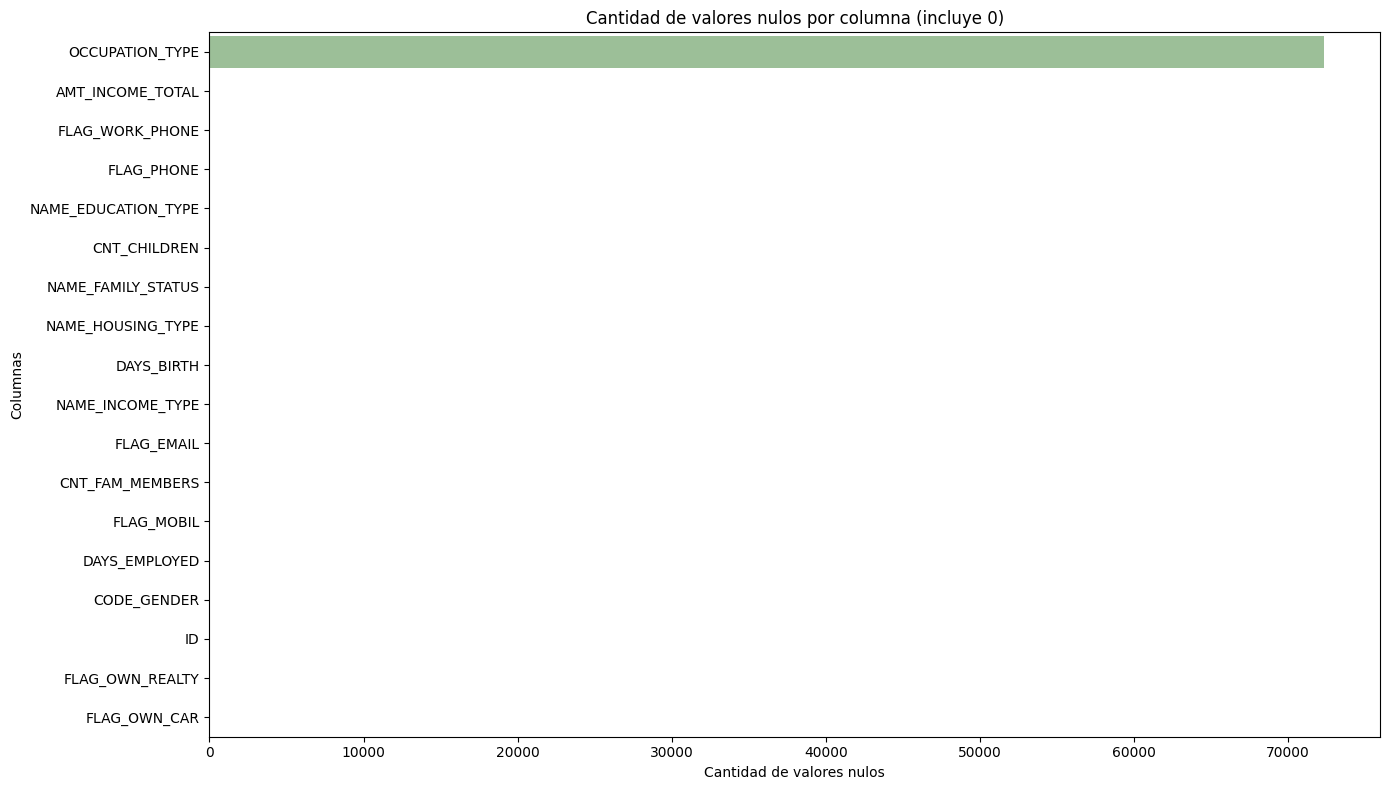

In [15]:
# Calcular la cantidad de nulos por columna
null_counts = application_record.isnull().sum()

# Calcular el porcentaje de nulos por columna
null_percent = (null_counts / len(application_record)) * 100

# Unir en un DataFrame para mayor claridad
null_df = pd.DataFrame({
    "Nulos": null_counts,
    "Porcentaje (%)": null_percent
})
print(null_df)
# Ordenar por cantidad de nulos (pero sin filtrar)
null_df = null_df.sort_values(by="Nulos", ascending=False)

# Gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x="Nulos", y=null_df.index, data=null_df, palette="crest")
plt.title("Cantidad de valores nulos por columna (incluye 0)")
plt.xlabel("Cantidad de valores nulos")
plt.ylabel("Columnas")
plt.tight_layout()
plt.show()

                Nulos  Porcentaje (%)
ID                  0             0.0
MONTHS_BALANCE      0             0.0
STATUS              0             0.0


/tmp/ipython-input-1203325122.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Nulos", y=null_df.index, data=null_df, palette="crest")


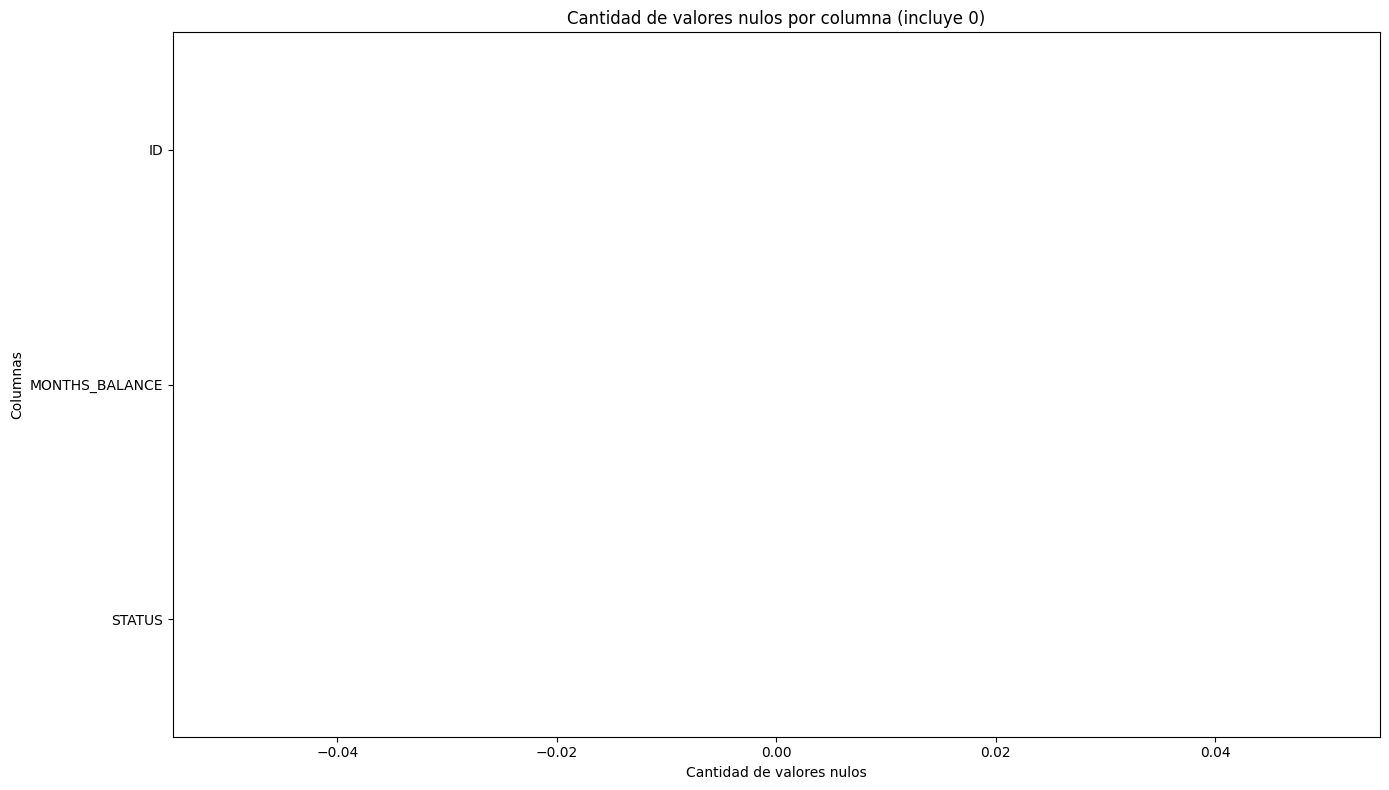

In [16]:
# Calcular la cantidad de nulos por columna
null_counts = credit_record.isnull().sum()

# Calcular el porcentaje de nulos por columna
null_percent = (null_counts / len(credit_record)) * 100

# Unir en un DataFrame para mayor claridad
null_df = pd.DataFrame({
    "Nulos": null_counts,
    "Porcentaje (%)": null_percent
})
print(null_df)
# Ordenar por cantidad de nulos (pero sin filtrar)
null_df = null_df.sort_values(by="Nulos", ascending=False)

# Gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x="Nulos", y=null_df.index, data=null_df, palette="crest")
plt.title("Cantidad de valores nulos por columna (incluye 0)")
plt.xlabel("Cantidad de valores nulos")
plt.ylabel("Columnas")
plt.tight_layout()
plt.show()

In [17]:
# Eliminar columna con valores nulos

#Se hace una copia del dataframe original, para tenerlo como respaldo

new_application_record = application_record.copy()
new_application_record.drop('OCCUPATION_TYPE', axis=1,inplace=True)

new_application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236928 entries, 0 to 236927
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   236928 non-null  int64  
 1   CODE_GENDER          236928 non-null  object 
 2   FLAG_OWN_CAR         236928 non-null  object 
 3   FLAG_OWN_REALTY      236928 non-null  object 
 4   CNT_CHILDREN         236927 non-null  float64
 5   AMT_INCOME_TOTAL     236927 non-null  float64
 6   NAME_INCOME_TYPE     236927 non-null  object 
 7   NAME_EDUCATION_TYPE  236927 non-null  object 
 8   NAME_FAMILY_STATUS   236927 non-null  object 
 9   NAME_HOUSING_TYPE    236927 non-null  object 
 10  DAYS_BIRTH           236927 non-null  float64
 11  DAYS_EMPLOYED        236927 non-null  float64
 12  FLAG_MOBIL           236927 non-null  float64
 13  FLAG_WORK_PHONE      236927 non-null  float64
 14  FLAG_PHONE           236927 non-null  float64
 15  FLAG_EMAIL       

In [18]:
new_application_record.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS'],
      dtype='object')

#### 4.1.1. Eliminacion de duplicados

In [19]:
#Cada ID en este dataframe representa una solicitud de credito por parte de una persona. Los IDs deberian ser unicos
#Se verifica que no hayan IDs duplicados
print(f"TOTAL DE REGISTROS: {len(new_application_record)}")
print(f"TOTAL DE REGISTROS UNICOS: {len(new_application_record['ID'].unique())}")

TOTAL DE REGISTROS: 236928
TOTAL DE REGISTROS UNICOS: 236928


In [20]:
#EXISTEN REGISTROS DUPLICADOS. SE ELIMINAN LOS DUPLICADOS Y SE MANTIENE EL ULTIMO REGISTRO (ULTIMA APLICACION AL CREDITO)
new_application_record.drop_duplicates(subset='ID', keep='last', inplace=True)

print(f"TOTAL DE REGISTROS: {len(new_application_record)}")
print(f"TOTAL DE REGISTROS UNICOS: {len(new_application_record['ID'].unique())}")

TOTAL DE REGISTROS: 236928
TOTAL DE REGISTROS UNICOS: 236928


In [22]:
#Cada ID en este dataframe representa una solicitud de credito por parte de una persona. Los IDs deberian ser unicos
#Se verifica que no hayan IDs duplicados
print(f"TOTAL DE REGISTROS: {len(credit_record)}")
print(f"TOTAL DE REGISTROS UNICOS: {len(credit_record['ID'].unique())}")

TOTAL DE REGISTROS: 1048575
TOTAL DE REGISTROS UNICOS: 45985


### 4.1.2. Union de DataFrame

In [23]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [24]:
new_application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236928 entries, 0 to 236927
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   236928 non-null  int64  
 1   CODE_GENDER          236928 non-null  object 
 2   FLAG_OWN_CAR         236928 non-null  object 
 3   FLAG_OWN_REALTY      236928 non-null  object 
 4   CNT_CHILDREN         236927 non-null  float64
 5   AMT_INCOME_TOTAL     236927 non-null  float64
 6   NAME_INCOME_TYPE     236927 non-null  object 
 7   NAME_EDUCATION_TYPE  236927 non-null  object 
 8   NAME_FAMILY_STATUS   236927 non-null  object 
 9   NAME_HOUSING_TYPE    236927 non-null  object 
 10  DAYS_BIRTH           236927 non-null  float64
 11  DAYS_EMPLOYED        236927 non-null  float64
 12  FLAG_MOBIL           236927 non-null  float64
 13  FLAG_WORK_PHONE      236927 non-null  float64
 14  FLAG_PHONE           236927 non-null  float64
 15  FLAG_EMAIL       

In [25]:
# 1. Renombrar columnas para facilitar la unión
credit_record.rename(columns={
    "ID": "ID_CLIENTE",
    "MONTHS_BALANCE": "MES_REGISTRO",
    "STATUS": "ESTADO_CREDITO"
}, inplace=True)

# 2. Crear una copia de application_record con el nombre del ID estandarizado
application_record_renamed = new_application_record.rename(columns={"ID": "ID_CLIENTE"})

new_credito = credit_record.copy()

new_credito['ESTADO_CREDITO'] = new_credito['ESTADO_CREDITO'].replace({
    'C': 0,
    'X': 1
    })


#Se convierte la columna a entero para poder aplicar el lambda y usar el >=
new_credito["ESTADO_CREDITO"] = new_credito["ESTADO_CREDITO"].astype(int)


#Si el valor es mayor o igual a 2 (rango riesgoso), se devuelve 0. De lo contrario (rango aceptable sin considerar
#los valores C y X) se devuelve un 1
new_credito["ESTADO_CREDITO"] = new_credito["ESTADO_CREDITO"].apply(lambda x: 0 if x >= 2 else 1)

print(new_credito['ESTADO_CREDITO'].value_counts())

print()
print(new_credito["ESTADO_CREDITO"].value_counts(normalize=True))


gr_credito = new_credito.groupby('ID_CLIENTE').agg(min).reset_index()

# 3. Realizar el merge manteniendo todos los registros de crédito
df_merged_completo = application_record_renamed.merge(gr_credito, on="ID_CLIENTE", how="inner")

# 4. Visualizar las primeras filas
df_merged_completo.info()

ESTADO_CREDITO
1    1045471
0       3104
Name: count, dtype: int64

ESTADO_CREDITO
1    0.99704
0    0.00296
Name: proportion, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36105 entries, 0 to 36104
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_CLIENTE           36105 non-null  int64  
 1   CODE_GENDER          36105 non-null  object 
 2   FLAG_OWN_CAR         36105 non-null  object 
 3   FLAG_OWN_REALTY      36105 non-null  object 
 4   CNT_CHILDREN         36105 non-null  float64
 5   AMT_INCOME_TOTAL     36105 non-null  float64
 6   NAME_INCOME_TYPE     36105 non-null  object 
 7   NAME_EDUCATION_TYPE  36105 non-null  object 
 8   NAME_FAMILY_STATUS   36105 non-null  object 
 9   NAME_HOUSING_TYPE    36105 non-null  object 
 10  DAYS_BIRTH           36105 non-null  float64
 11  DAYS_EMPLOYED        36105 non-null  float64
 12  FLAG_MOBIL           36105 non-null  float64

/tmp/ipython-input-3146719415.py:33: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  gr_credito = new_credito.groupby('ID_CLIENTE').agg(min).reset_index()


In [26]:
df_merged_completo.head()

,ID_CLIENTE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MES_REGISTRO,ESTADO_CREDITO
0,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0,-15,1
1,5008805,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0,-14,1
2,5008806,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,2.0,-29,1
3,5008808,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,1.0,-4,1
4,5008809,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,1.0,-26,1


In [27]:
df_merged_completo["ESTADO_CREDITO"].value_counts()

,count
ESTADO_CREDITO,
1,35841
0,264


In [28]:
df_merged_completo.describe()

,ID_CLIENTE,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MES_REGISTRO,ESTADO_CREDITO
count,3.610500e+04,36105.000000,3.610500e+04,36105.000000,36105.000000,36105.0,36105.000000,36105.000000,36105.000000,36105.000000,36105.000000,36105.000000
mean,5.078205e+06,0.430854,1.866752e+05,-15976.549453,59190.176818,1.0,0.225592,0.295278,0.089766,2.199501,-26.171555,0.992688
std,4.186918e+04,0.742747,1.018650e+05,4200.196605,137591.973094,0.0,0.417977,0.456174,0.285850,0.911920,16.532223,0.085198
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042019e+06,0.000000,1.215000e+05,-19439.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,5.074548e+06,0.000000,1.575000e+05,-15564.000000,-1555.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,1.000000
75%,5.114649e+06,1.000000,2.250000e+05,-12475.000000,-410.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,1.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


#### 4.1.2. Eliminación de columnas específicas innecesarias

In [29]:
# Lista de columnas a eliminar
columnas_a_eliminar = [
    "FLAG_MOBIL",
    "FLAG_WORK_PHONE",
    "FLAG_PHONE",
    "FLAG_EMAIL",
    "ID_CLIENTE"
]

# Eliminamos esas columnas del DataFrame original
df_merged_completo = df_merged_completo.drop(columns=columnas_a_eliminar)

# Verificamos las columnas restantes
df_merged_completo.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MES_REGISTRO,ESTADO_CREDITO
0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,2.0,-15,1
1,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,2.0,-14,1
2,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,2.0,-29,1
3,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,-4,1
4,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,-26,1


Convertir los dias de nacidos en años de edad

- Convierte los días negativos desde el nacimiento en valores positivos.

- Divide por 365.25 para considerar años bisiestos.

- Redondea hacia abajo (//) y convierte el resultado a entero.

- La columna `DAYS_BIRTH` queda ahora con edades reales en años, y ya no contiene días.

In [30]:
# Reemplazar valores de DAYS_BIRTH por edad (en años, como entero)
df_merged_completo["DAYS_BIRTH"] = (df_merged_completo["DAYS_BIRTH"] * -1) // 365.25
df_merged_completo["DAYS_BIRTH"] = df_merged_completo["DAYS_BIRTH"].astype(int)

Convertir los dias de empleado en años de empleados

In [31]:
# Reemplazar días por años en la misma columna y cambiar signo
df_merged_completo["DAYS_EMPLOYED"] = (df_merged_completo["DAYS_EMPLOYED"] * -1) / 365.25
df_merged_completo["DAYS_EMPLOYED"] = df_merged_completo["DAYS_EMPLOYED"].round(1)

In [32]:
# Cambiar varias columnas al mismo tiempo
df_merged_completo.rename(columns={
    "DAYS_EMPLOYED": "YEARS_EMPLOYED",
    "DAYS_BIRTH": "AGE_YEARS"
}, inplace=True)

In [33]:
df_merged_completo.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,MES_REGISTRO,ESTADO_CREDITO
0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12.4,2.0,-15,1
1,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12.4,2.0,-14,1
2,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58,3.1,2.0,-29,1
3,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8.4,1.0,-4,1
4,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8.4,1.0,-26,1


In [34]:
new_credito = credit_record.copy()
new_credito

,ID_CLIENTE,MES_REGISTRO,ESTADO_CREDITO
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


### 3.1. Unión de DataFrame (YA SE HIZO ANTES. LO MANTENGO POR SI ACASO PERO NO LO VOY A EJECUTAR)


In [ ]:
# 1. Renombrar columnas del DataFrame credit_record
credit_record.rename(columns={
    "ID": "ID_CLIENTE",
    "MONTHS_BALANCE": "MES_REGISTRO",
    "STATUS": "ESTADO_CREDITO"
}, inplace=True)

# 2. Crear resumen del historial crediticio por cliente
# Interpretación: contar cuántas veces tuvo mora de 1 o más meses (STATUS 1 a 5), o 'C' (cancelaciones)
def contar_moras(status_series):
    return status_series.isin(['1','2','3','4','5']).sum()

def contar_cancelaciones(status_series):
    return (status_series == 'C').sum()

resumen_credito = credit_record.groupby("ID_CLIENTE").agg({
    "ESTADO_CREDITO": [
        contar_moras,
        contar_cancelaciones,
        "count"  # Total de registros (duración del historial)
    ]
})


# 3. Renombrar columnas del resumen
resumen_credito.columns = [
    "NUM_MORAS",        # Casos de mora entre 30 y 150 días
    "NUM_CANCELACIONES",# Cancelaciones (más de 150 días)
    "MESES_REGISTRADOS" # Total de meses con registros
]




# 4. Resetear índice para merge posterior
resumen_credito.reset_index(inplace=True)

# 5. Unir con application_record (ID vs ID_CLIENTE)
df_merged_completo = application_record.merge(resumen_credito, left_on="ID", right_on="ID_CLIENTE", how="left")

# 6. Ver las primeras filas del DataFrame final
df_merged_completo.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ID_CLIENTE,NUM_MORAS,NUM_CANCELACIONES,MESES_REGISTRADOS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,5008804.0,1.0,13.0,16.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,5008805.0,1.0,12.0,15.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,5008806.0,0.0,7.0,30.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,5008808.0,0.0,0.0,5.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,5008809.0,0.0,0.0,5.0


In [35]:
new_credito = resumen_credito.copy()
new_credito

NameError: name 'resumen_credito' is not defined

## 🧾 5. Identificación de variables categóricas a numéricas




In [36]:
#OBTENER COLUMNAS CATEGORICAS/NO NUMERICAS
categorical_columns = df_merged_completo.select_dtypes(include=['object']).columns
categorical_columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'],
      dtype='object')

In [37]:
#OBTENER COLUMNAS NUMERICAS
numeric_columns = df_merged_completo.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AGE_YEARS', 'YEARS_EMPLOYED',
       'CNT_FAM_MEMBERS', 'MES_REGISTRO', 'ESTADO_CREDITO'],
      dtype='object')

In [38]:
#SE REVISAN LOS VALORES DE CADA COLUMNAS (CATEGORICAS)
for column in categorical_columns:
    print(f"{df_merged_completo[column].value_counts()}")
    print()

CODE_GENDER
F    24240
M    11865
Name: count, dtype: int64

FLAG_OWN_CAR
N    22384
Y    13721
Name: count, dtype: int64

FLAG_OWN_REALTY
Y    24309
N    11796
Name: count, dtype: int64

NAME_INCOME_TYPE
Working                 18644
Commercial associate     8416
Pensioner                6069
State servant            2965
Student                    11
Name: count, dtype: int64

NAME_EDUCATION_TYPE
Secondary / secondary special    24536
Higher education                  9769
Incomplete higher                 1398
Lower secondary                    370
Academic degree                     32
Name: count, dtype: int64

NAME_FAMILY_STATUS
Married                 24837
Single / not married     4760
Civil marriage           2915
Separated                2090
Widow                    1503
Name: count, dtype: int64

NAME_HOUSING_TYPE
House / apartment      32248
With parents            1761
Municipal apartment     1102
Rented apartment         571
Office apartment         257
Co-op apartment  

In [39]:
#SE MODIFICAN LOS VALORES DE LAS COLUMNAS NAME EDUCATION Y NAME HOUSING TYPE (PARA QUE SE VEAN MEJOR EN LOS GRAFICOS)
df_merged_completo['NAME_EDUCATION_TYPE'] = df_merged_completo['NAME_EDUCATION_TYPE'].replace({
    "Higher education":"College",
    "Secondary / secondary special":"Secondary",
    "Incomplete higher":"Incomplete Coll",
    "Lower secondary":"Low.Secondary",
    "Academic degree":"Aca.Dgre"
})

df_merged_completo['NAME_HOUSING_TYPE'] = df_merged_completo['NAME_HOUSING_TYPE'].replace({
    "House / apartment":"House/Apt",
    "Rented apartment":"Rent",
    "With parents":"W/Parents",
    "Municipal apartment":"Municipal",
    "Co-op apartment":"Co-op",
    "Office apartment":"Office"
})

print(df_merged_completo['NAME_EDUCATION_TYPE'].unique())
print(df_merged_completo['NAME_HOUSING_TYPE'].unique())



['College' 'Secondary' 'Incomplete Coll' 'Low.Secondary' 'Aca.Dgre']
['Rent' 'House/Apt' 'Municipal' 'W/Parents' 'Co-op' 'Office']


In [40]:
df_merged_completo.head(1)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,MES_REGISTRO,ESTADO_CREDITO
0,M,Y,Y,0.0,427500.0,Working,College,Civil marriage,Rent,32,12.4,2.0,-15,1


## 6. Análisis gráfico de variables categóricas (gráfico de barras).

CODE_GENDER
F    24240
M    11865
Name: count, dtype: int64


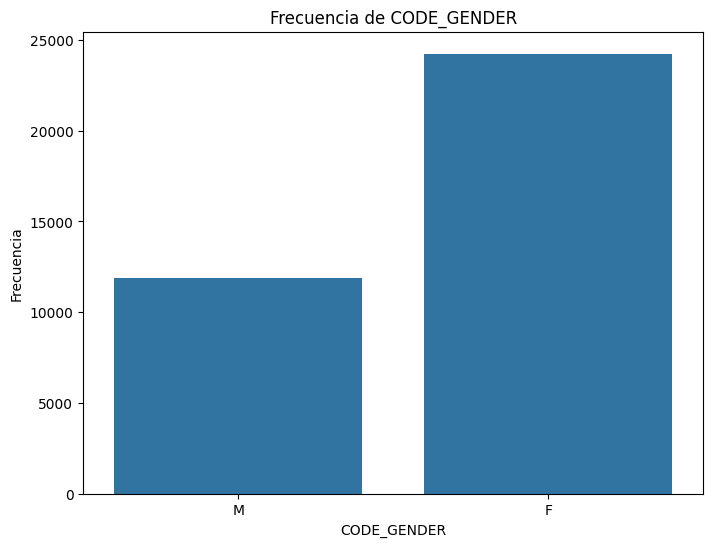

FLAG_OWN_CAR
N    22384
Y    13721
Name: count, dtype: int64


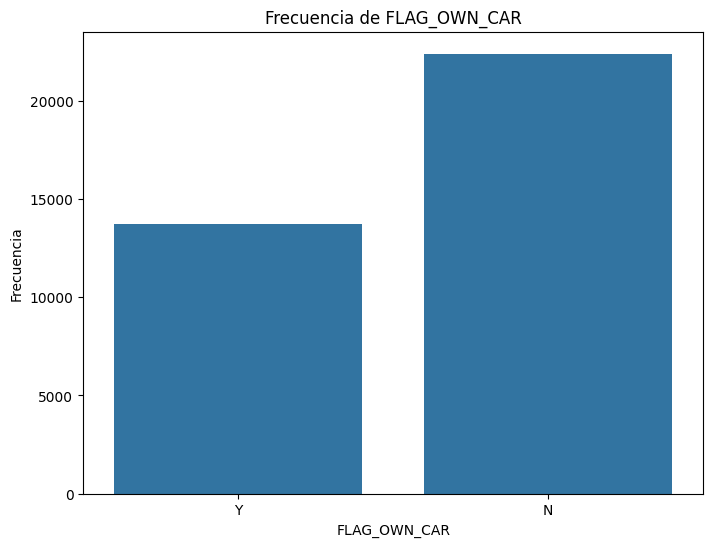

FLAG_OWN_REALTY
Y    24309
N    11796
Name: count, dtype: int64


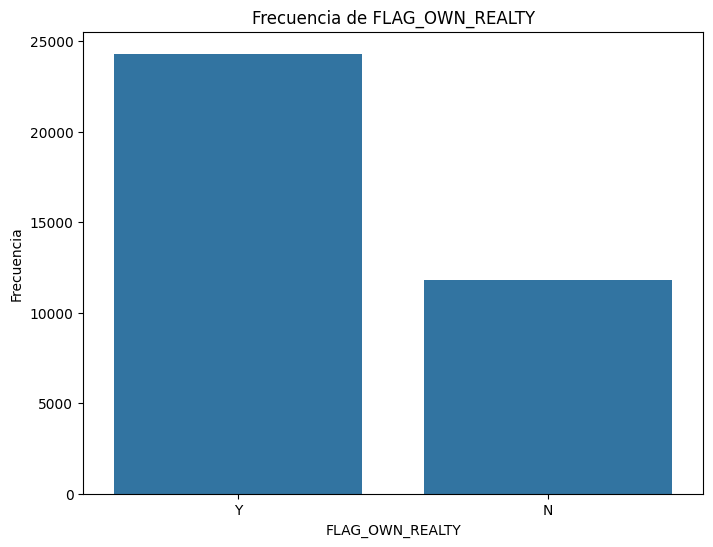

NAME_INCOME_TYPE
Working                 18644
Commercial associate     8416
Pensioner                6069
State servant            2965
Student                    11
Name: count, dtype: int64


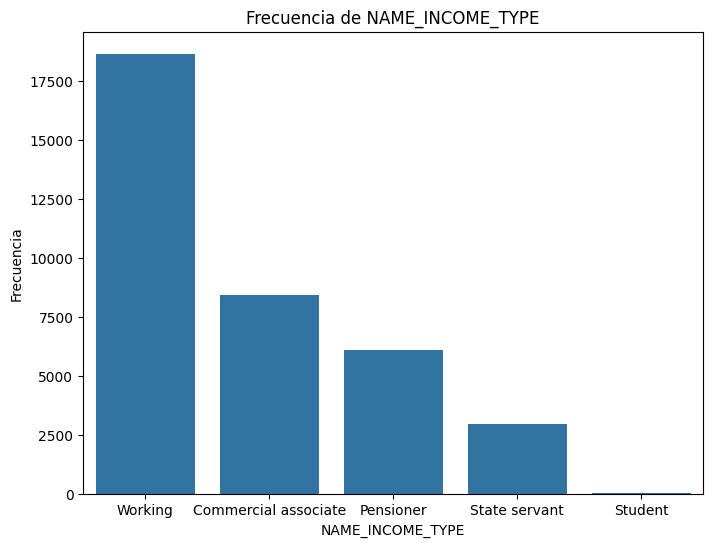

NAME_EDUCATION_TYPE
Secondary          24536
College             9769
Incomplete Coll     1398
Low.Secondary        370
Aca.Dgre              32
Name: count, dtype: int64


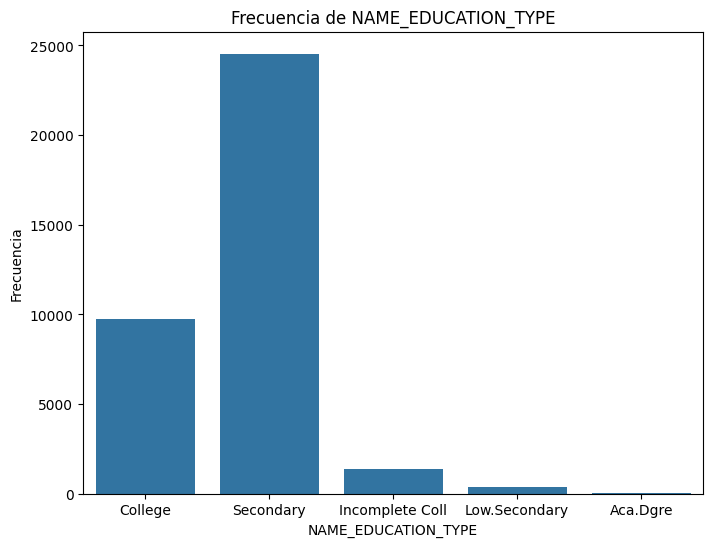

NAME_FAMILY_STATUS
Married                 24837
Single / not married     4760
Civil marriage           2915
Separated                2090
Widow                    1503
Name: count, dtype: int64


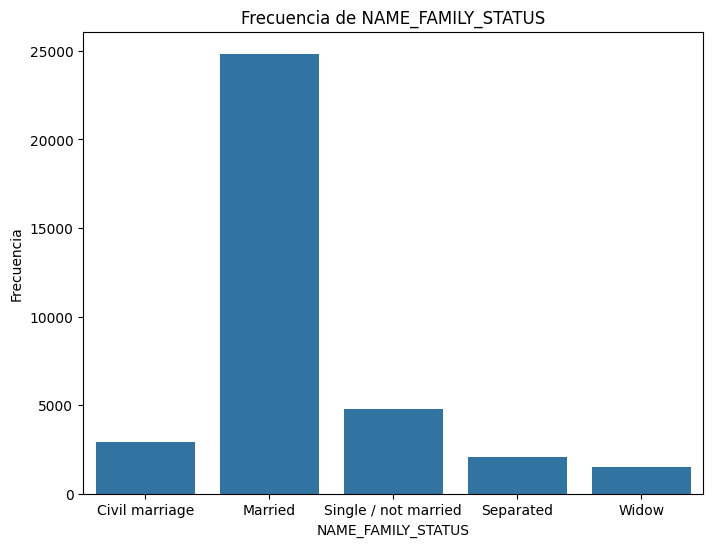

NAME_HOUSING_TYPE
House/Apt    32248
W/Parents     1761
Municipal     1102
Rent           571
Office         257
Co-op          166
Name: count, dtype: int64


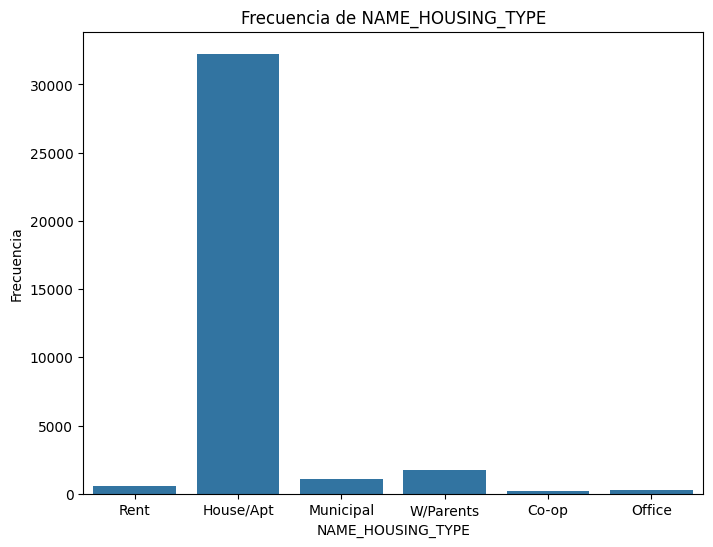

In [41]:
#GRAFICOS REPRESENTANDO LA CANTIDAD DE REGISTROS DE LAS VARIABLES CATEGORICAS

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_merged_completo, x=column)
    plt.title(f'Frecuencia de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    print(df_merged_completo[column].value_counts())
    plt.show()

## 📋 7.Tabla resumen de estadísticas descriptivas de variables numéricas


In [42]:
# Seleccionamos solo las columnas numéricas
numeric_columns = df_merged_completo.select_dtypes(include=["int64", "float64"]).columns

# Generamos la tabla resumen
summary_table = df_merged_completo[numeric_columns].describe().T

# Agregamos la mediana como nueva columna
summary_table["median"] = df_merged_completo[numeric_columns].median()

# Reordenamos las columnas para que sea más clara
summary_table = summary_table[["count", "mean", "std", "min", "25%", "median", "50%", "75%", "max"]]

# Mostramos la tabla
summary_table

,count,mean,std,min,25%,median,50%,75%,max
CNT_CHILDREN,36105.0,0.430854,0.742747,0.0,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,36105.0,186675.184337,101864.970901,27000.0,121500.0,157500.0,157500.0,225000.0,1575000.0
AGE_YEARS,36105.0,43.235674,11.502752,20.0,34.0,42.0,42.0,53.0,68.0
YEARS_EMPLOYED,36105.0,-162.057527,376.713267,-1000.0,1.1,4.3,4.3,8.6,43.0
CNT_FAM_MEMBERS,36105.0,2.199501,0.911920,1.0,2.0,2.0,2.0,3.0,20.0
MES_REGISTRO,36105.0,-26.171555,16.532223,-60.0,-39.0,-24.0,-24.0,-12.0,0.0
ESTADO_CREDITO,36105.0,0.992688,0.085198,0.0,1.0,1.0,1.0,1.0,1.0


## 📊 8. Histograma + Curva KDE para `AGE_YEARS`

Histograma con curva de densidad para una variable continua.

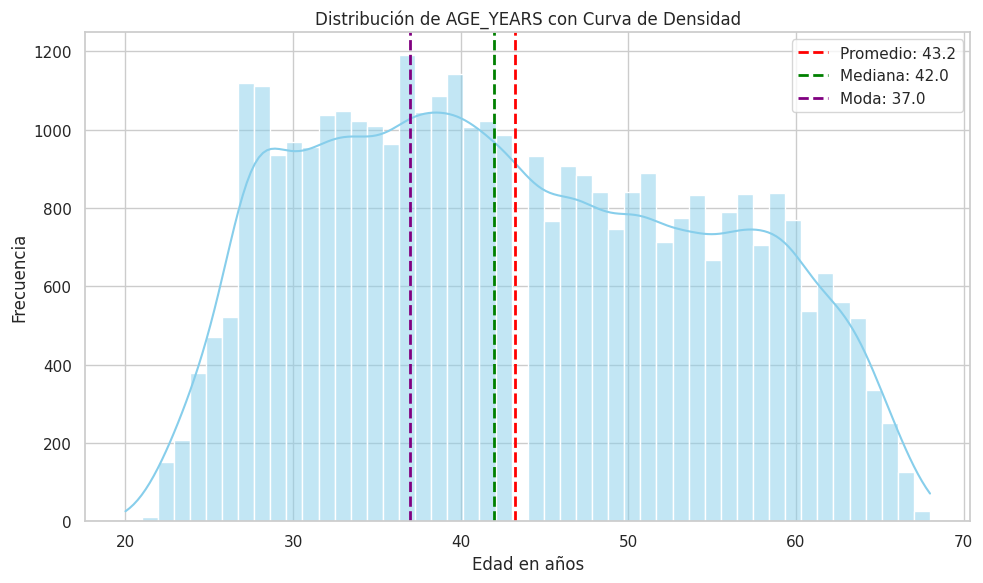

In [43]:
# Estilo visual
sns.set(style="whitegrid")

# Calcular estadísticas
mean_val = df_merged_completo["AGE_YEARS"].mean()
median_val = df_merged_completo["AGE_YEARS"].median()
mode_val = df_merged_completo["AGE_YEARS"].mode()[0]

# Crear gráfico
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_merged_completo,
    x="AGE_YEARS",
    kde=True,
    bins=50,
    color="skyblue"
)

# Agregar líneas verticales punteadas
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Promedio: {mean_val:.1f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.1f}')
plt.axvline(mode_val, color='purple', linestyle='--', linewidth=2, label=f'Moda: {mode_val:.1f}')

# Etiquetas
plt.title("Distribución de AGE_YEARS con Curva de Densidad")
plt.xlabel("Edad en años")
plt.ylabel("Frecuencia")
plt.legend()
plt.tight_layout()
plt.show()

## 🔔 9. Analisis de Normalidad


### 🧪 9.1. Evaluación de la Normalidad Estadística (Shapiro y KS)

Primera etapa, sin eliminacion o tratamiento de outliers

In [44]:
# Copia de trabajo para no modificar el DataFrame original
df = df_merged_completo.copy()

# Lista de columnas numéricas ya declaradas (omitimos columnas como 'ID')
numeric_columns_cleaned = [col for col in numeric_columns if col != "ID"]

# Nivel de significancia
alpha = 0.05

# Lista para resultados
resultados = []

# Iteración por cada variable numérica
for col in numeric_columns_cleaned:
    datos = df[col].dropna()

    if len(datos) < 20:
        # No se recomienda aplicar pruebas de normalidad con muy pocos datos
        resultados.append({
            "Variable": col,
            "p-value Shapiro": np.nan,
            "Normal Shapiro (α=0.05)": "Insuficiente n",
            "p-value KS": np.nan,
            "Normal KS (α=0.05)": "Insuficiente n"
        })
        continue

    # Shapiro-Wilk (máx recomendado: 5000 muestras)
    muestra = datos.sample(n=min(5000, len(datos)), random_state=42)
    stat_shapiro, p_shapiro = shapiro(muestra)

    # Kolmogorov-Smirnov con media y desviación estándar empírica
    stat_ks, p_ks = kstest(datos, 'norm', args=(datos.mean(), datos.std()))

    resultados.append({
        "Variable": col,
        "p-value Shapiro": round(p_shapiro, 4),
        "Normal Shapiro (α=0.05)": p_shapiro > alpha,
        "p-value KS": round(p_ks, 4),
        "Normal KS (α=0.05)": p_ks > alpha
    })

# Resultado final como tabla
normalidad_df = pd.DataFrame(resultados)
print("📊 Resultado de pruebas de normalidad:\n")
print(normalidad_df)

📊 Resultado de pruebas de normalidad:

           Variable  p-value Shapiro  Normal Shapiro (α=0.05)  p-value KS  \
0      CNT_CHILDREN              0.0                    False         0.0   
1  AMT_INCOME_TOTAL              0.0                    False         0.0   
2         AGE_YEARS              0.0                    False         0.0   
3    YEARS_EMPLOYED              0.0                    False         0.0   
4   CNT_FAM_MEMBERS              0.0                    False         0.0   
5      MES_REGISTRO              0.0                    False         0.0   
6    ESTADO_CREDITO              0.0                    False         0.0   

   Normal KS (α=0.05)  
0               False  
1               False  
2               False  
3               False  
4               False  
5               False  
6               False  


### 9.2. Q-Q Plot para cada variable numérica continua

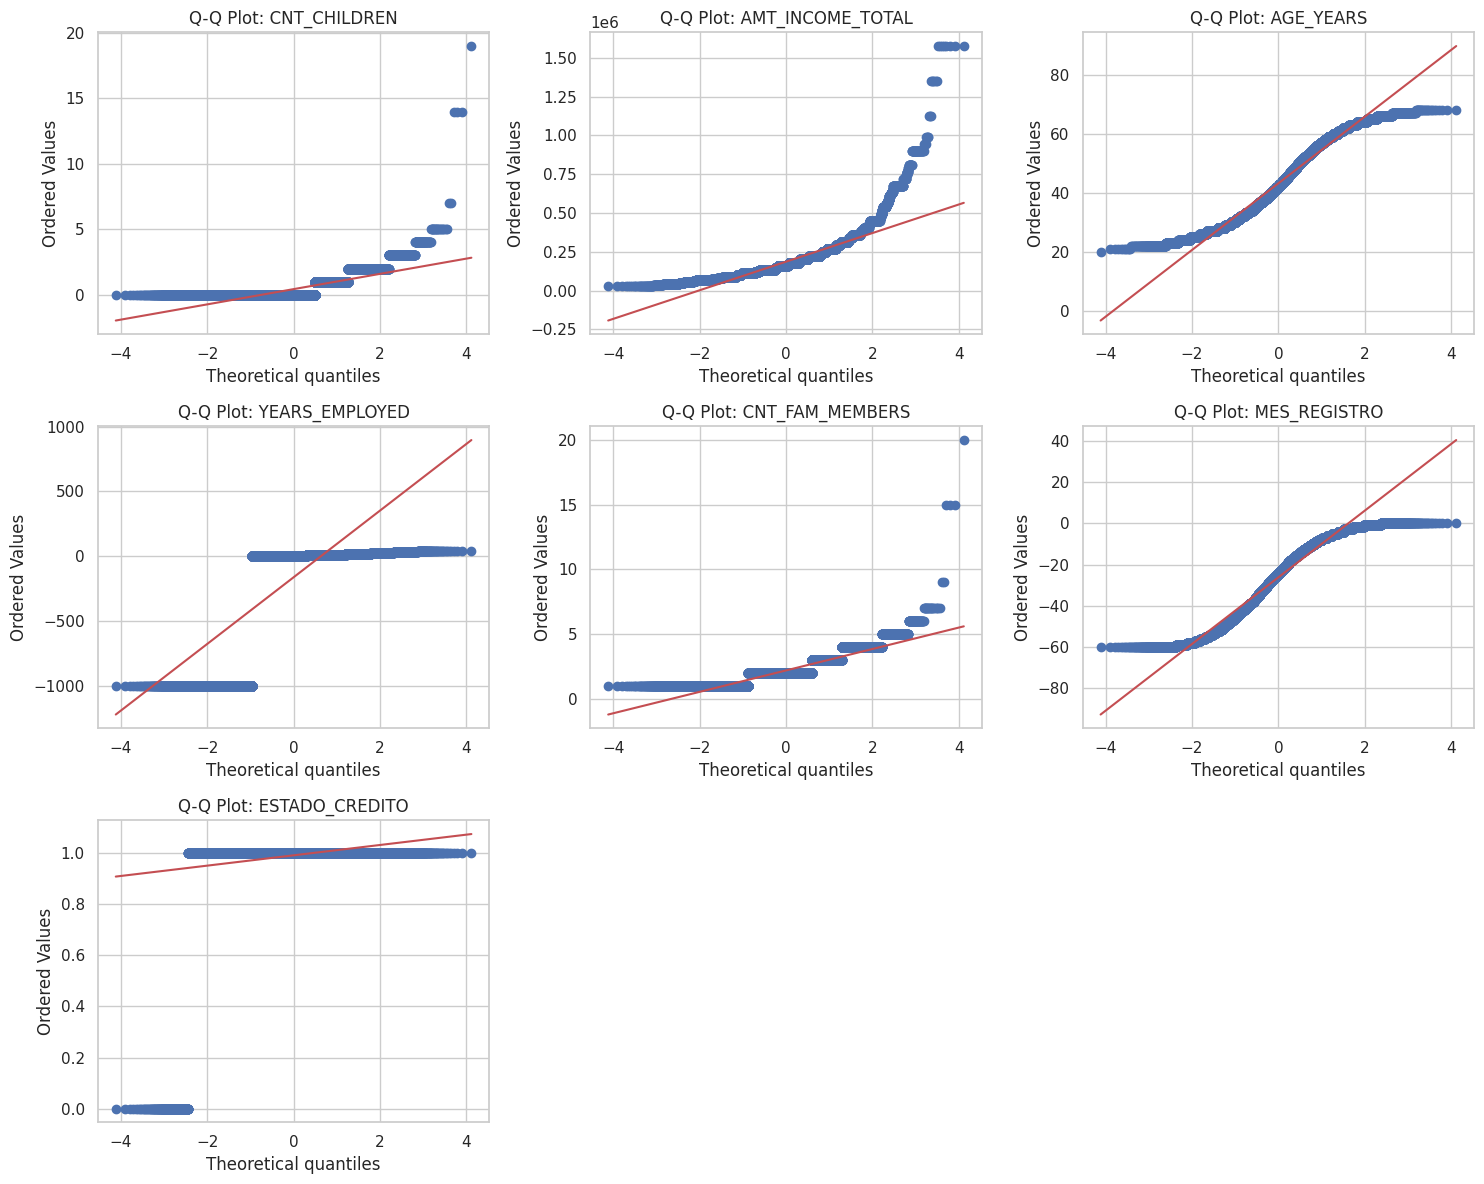

In [45]:
# Número de columnas a graficar
num_vars = len(numeric_columns)
cols = 3  # columnas en la grilla
rows = (num_vars + cols - 1) // cols  # filas necesarias

# Grilla de subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

# Graficar un Q-Q plot por variable
for i, col in enumerate(numeric_columns):
    probplot(df[col].dropna(), dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot: {col}")

# Eliminar subgráficos vacíos si hay menos plots que espacios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 📦 10. Identificación de datos atípicos (boxplot).

### 🔍 10.1. Detección outliers por gráfica

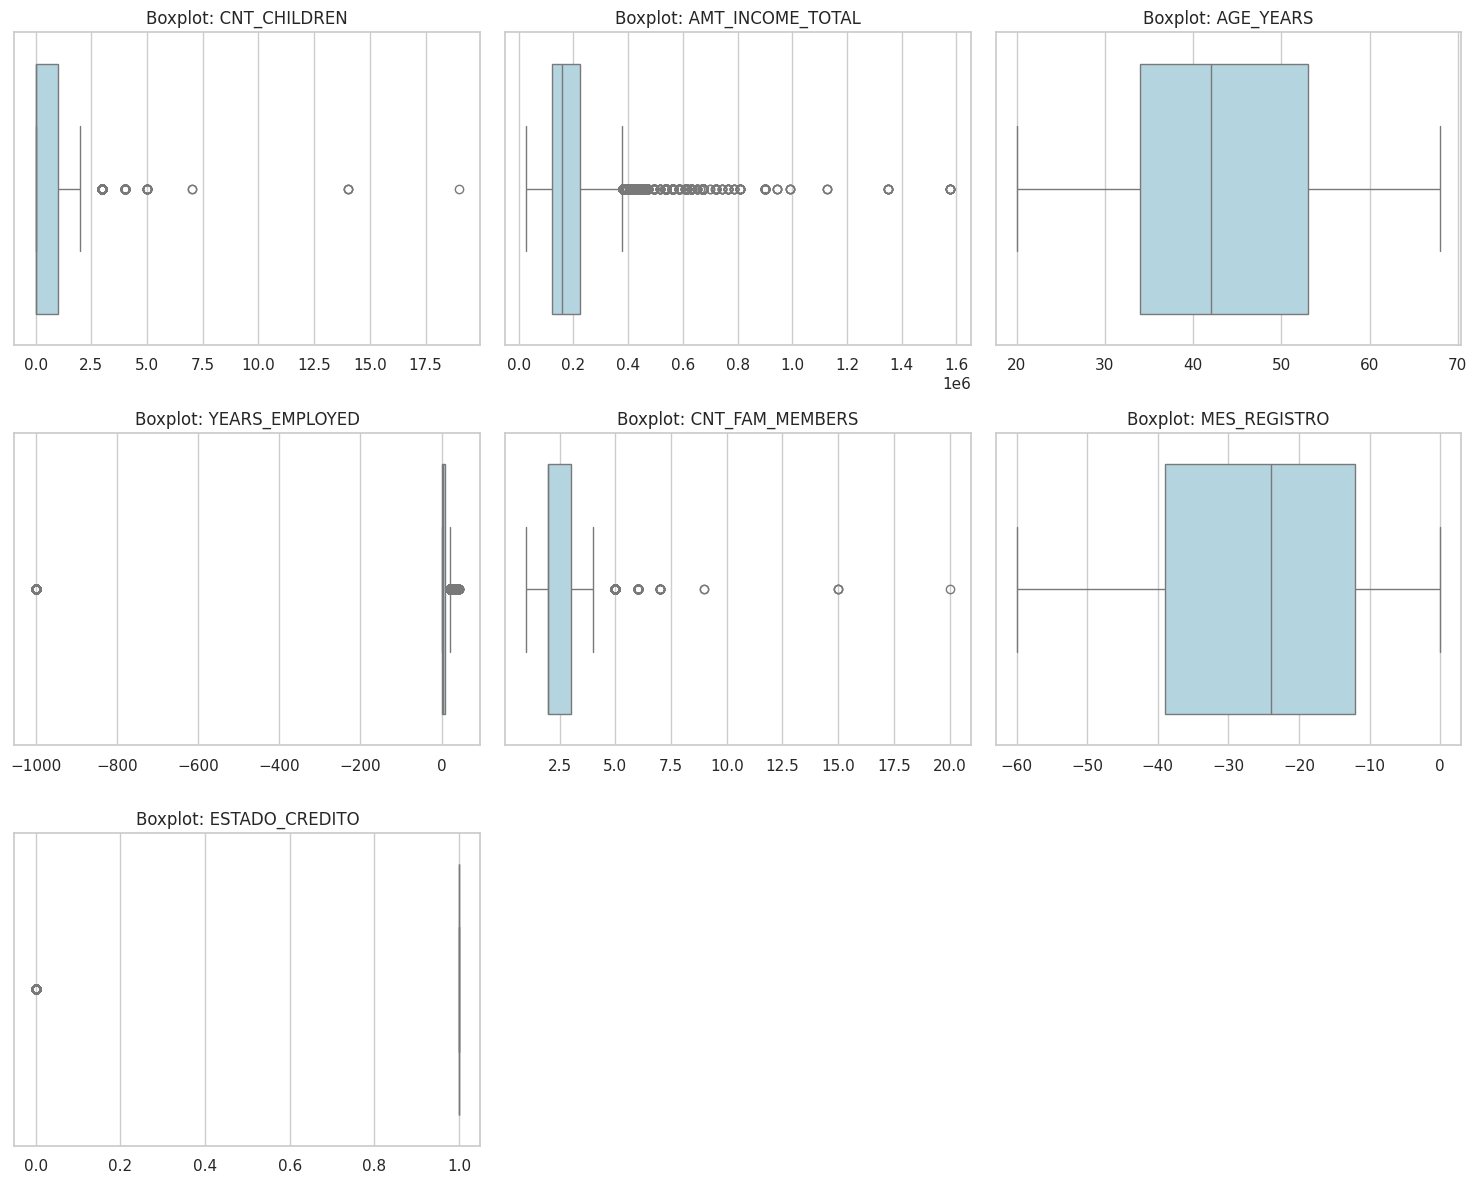

In [46]:
# Supongamos que estás trabajando con este DataFrame:
df = df_merged_completo.copy()

# Parámetros para la grilla
cols = 3  # columnas por fila
rows = (len(numeric_columns) + cols - 1) // cols

# Crear subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

# Graficar boxplot para cada variable
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, x=col, ax=axes[i], color='lightblue')
    axes[i].set_title(f"Boxplot: {col}")
    axes[i].set_xlabel("")  # opcional para espacio

# Eliminar subplots vacíos si hay menos columnas que espacios en la grilla
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### 🔍 10.2. Detección outliers por rango intercuartílico (IQR)

📌 Método 1: **Z-score**

* Útil si los datos están normalmente distribuidos.
* Considera *outlier* si `|Z| > 3`.

📌 Método 2: **Rango intercuartílico (IQR)**

* No asume distribución normal.
* Detecta valores fuera del rango:

  $$
  \text{outlier} < Q1 - 1.5 \times IQR \quad \text{o} \quad > Q3 + 1.5 \times IQR
  $$

In [47]:
# Definir el DataFrame base
df = df_merged_completo.copy()

# Lista de columnas numéricas
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Diccionario para guardar resultados
outliers_iqr_summary = []

# Recorremos cada variable numérica
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Límites para detectar outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Conteo de outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = outliers.shape[0]
    perc_outliers = 100 * num_outliers / len(df)

    # Guardamos resultados
    outliers_iqr_summary.append({
        "Variable": col,
        "Outliers detectados": num_outliers,
        "Porcentaje (%)": round(perc_outliers, 2)
    })

# Convertimos en DataFrame
outliers_iqr_df = pd.DataFrame(outliers_iqr_summary).sort_values(by="Outliers detectados", ascending=False)

# Mostramos resumen
print(outliers_iqr_df.head(10))

           Variable  Outliers detectados  Porcentaje (%)
3    YEARS_EMPLOYED                 7863           21.78
1  AMT_INCOME_TOTAL                 1511            4.19
0      CNT_CHILDREN                  501            1.39
4   CNT_FAM_MEMBERS                  473            1.31
6    ESTADO_CREDITO                  264            0.73
2         AGE_YEARS                    0            0.00
5      MES_REGISTRO                    0            0.00


### 🧹 10.3. Tratamiento de Datos Atípicos (Outliers)


#### 🔍 10.3.1. Código para sugerir método de imputación por variable numérica

 Para determinar **cuál es el mejor método de imputación** (media, mediana o moda) para cada variable numérica de tu DataFrame, puedes guiarte por:

- La distribución (simétrica o asimétrica)

- La presencia de outliers

- La cantidad de valores únicos (discretos vs continuos)

A continuación, te dejo un **código estandarizado** que te ayuda a **analizar estas condiciones por variable** y sugerir el método de imputación más apropiado:

In [48]:
# 1. Selección de columnas numéricas
numeric_cols = df_merged_completo.select_dtypes(include=["int64", "float64"]).columns

# 2. Función para evaluar cada variable y sugerir método
def sugerir_imputacion(df, columns):
    sugerencias = []

    for col in columns:
        data = df[col].dropna()
        n_unicos = data.nunique()
        sesgo = skew(data)
        outliers = (np.abs((data - data.mean()) / data.std()) > 3).sum()

        if n_unicos <= 10:
            metodo = "Moda"
        elif abs(sesgo) < 0.5 and outliers < 5:
            metodo = "Media"
        elif abs(sesgo) >= 0.5 or outliers >= 5:
            metodo = "Mediana"
        else:
            metodo = "Revisar manualmente"

        sugerencias.append({
            "Variable": col,
            "Valores únicos": n_unicos,
            "Sesgo (Skew)": round(sesgo, 2),
            "Outliers (Z > 3)": outliers,
            "Sugerencia de imputación": metodo
        })

    return pd.DataFrame(sugerencias)

# 3. Aplicar función
reporte_imputacion = sugerir_imputacion(df_merged_completo, numeric_cols)

# 4. Mostrar resultados
import seaborn.objects as so  # (opcional, si se quiere gráficos más adelante)
reporte_imputacion

,Variable,Valores únicos,Sesgo (Skew),Outliers (Z > 3),Sugerencia de imputación
0,CNT_CHILDREN,9,2.57,501,Moda
1,AMT_INCOME_TOTAL,263,2.75,514,Mediana
2,AGE_YEARS,49,0.18,0,Media
3,YEARS_EMPLOYED,352,-1.77,0,Mediana
4,CNT_FAM_MEMBERS,10,1.30,473,Moda
5,MES_REGISTRO,61,-0.29,0,Media
6,ESTADO_CREDITO,2,-11.57,264,Moda


#### 🛠️ 10.3.2. Código para imputar outliers según sugerencias

In [51]:
# Hacemos una copia para no alterar el original
df_corr = df_merged_completo.copy()

# Diccionario con sugerencias extraídas de tu tabla
sugerencias = {
    "CNT_CHILDREN": "Mediana",
    "AMT_INCOME_TOTAL": "Mediana",
    "AGE_YEARS": "Media",
    "YEARS_EMPLOYED": "Mediana",
    "CNT_FAM_MEMBERS": "Mediana",
    "MES_REGISTRO": "Moda"
    # Las categóricas tipo "FLAG_" o "NAME_" no se imputan por Z-score (son moda general, no outliers)
}

# Imputación de outliers con Z-score > 3
for col, metodo in sugerencias.items():
    # Calcular Z-score
    z_scores = np.abs(zscore(df_corr[col]))
    outliers = z_scores > 3

    # Calcular el valor de reemplazo
    if metodo == "Media":
        valor = df_corr[col].mean()
    elif metodo == "Mediana":
        valor = df_corr[col].median()
    elif metodo == "Moda":
        valor = df_corr[col].mode()[0]

    # Reemplazar los outliers por el valor calculado
    df_corr.loc[outliers, col] = valor

# Resultado limpio
df_corr.head()

/tmp/ipython-input-3948949467.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '43.23567372940036' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_corr.loc[outliers, col] = valor


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,MES_REGISTRO,ESTADO_CREDITO
0,M,Y,Y,0.0,427500.0,Working,College,Civil marriage,Rent,32.0,12.4,2.0,-15,1
1,M,Y,Y,0.0,427500.0,Working,College,Civil marriage,Rent,32.0,12.4,2.0,-14,1
2,M,Y,Y,0.0,112500.0,Working,Secondary,Married,House/Apt,58.0,3.1,2.0,-29,1
3,F,N,Y,0.0,270000.0,Commercial associate,Secondary,Single / not married,House/Apt,52.0,8.4,1.0,-4,1
4,F,N,Y,0.0,270000.0,Commercial associate,Secondary,Single / not married,House/Apt,52.0,8.4,1.0,-26,1


Calcula los cuartiles Q1 y Q3 para cada columna numérica.

Aplica la fórmula del rango intercuartílico para detectar valores extremos.

Genera una tabla con:

- Nombre de la variable.

- Número de outliers detectados.

- Porcentaje que representan.

#### 10.3.3. Visualización de Variables Numéricas sin Outliers



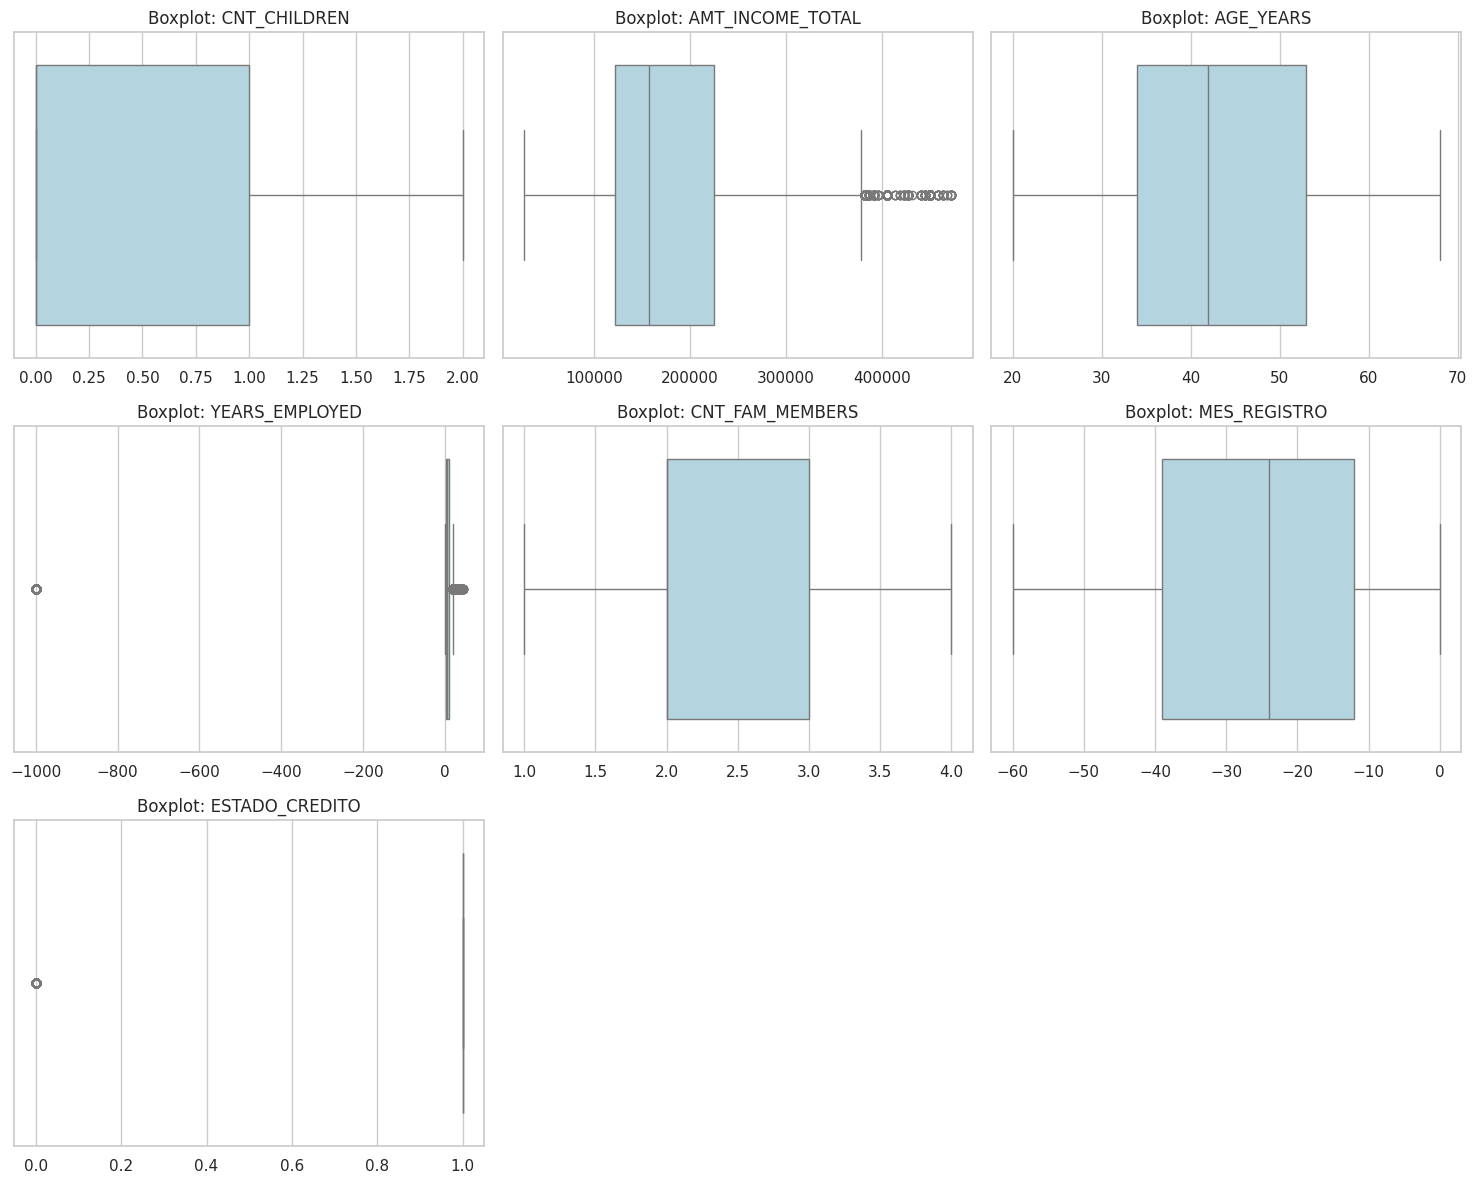

In [50]:
# Parámetros para la grilla
cols = 3  # columnas por fila
rows = (len(numeric_columns) + cols - 1) // cols

# Crear subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

# Graficar boxplot para cada variable
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df_corr, x=col, ax=axes[i], color='lightblue')
    axes[i].set_title(f"Boxplot: {col}")
    axes[i].set_xlabel("")  # opcional para espacio

# Eliminar subplots vacíos si hay menos columnas que espacios en la grilla
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### 🔔 10.3.4. Distribución Normal sin outliers

##### 10.3.4.1. Q-Q Plot para cada variable numérica continua

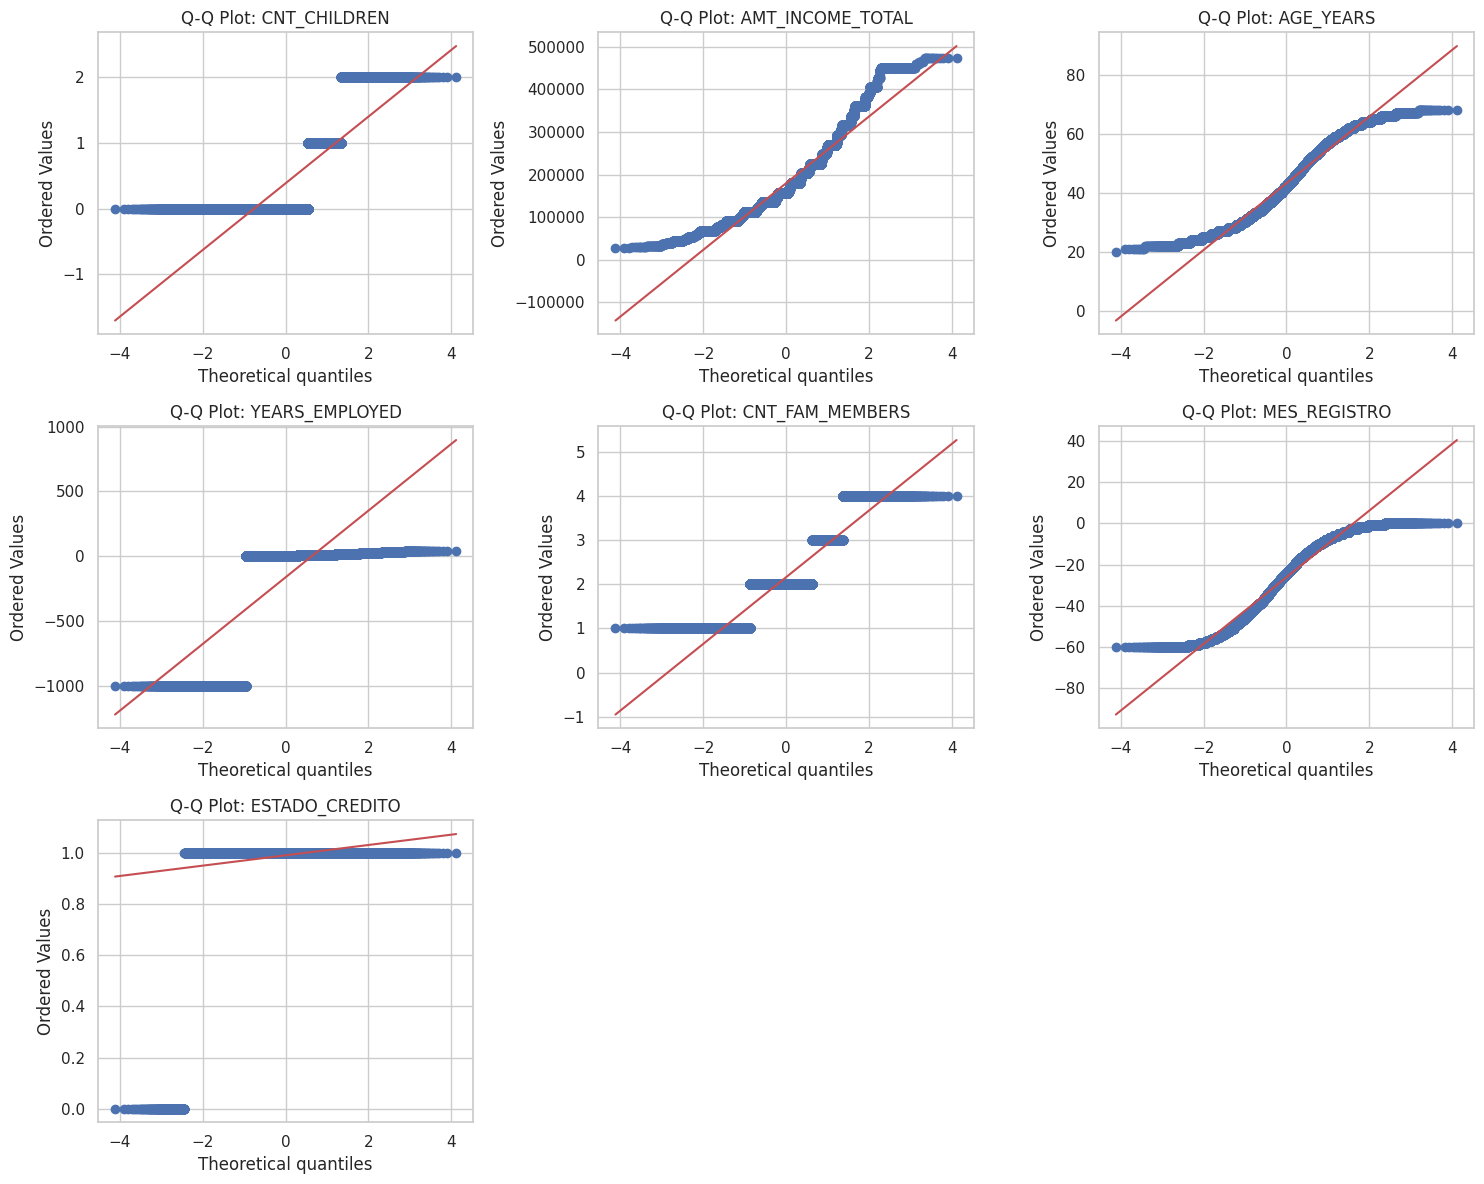

In [52]:
# Copia del DataFrame original
df = df_corr.copy()

# Selección automática de variables
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Número de columnas a graficar
num_vars = len(numeric_columns)
cols = 3  # columnas en la grilla
rows = (num_vars + cols - 1) // cols  # filas necesarias

# Grilla de subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

# Graficar un Q-Q plot por variable
for i, col in enumerate(numeric_columns):
    probplot(df[col].dropna(), dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot: {col}")

# Eliminar subgráficos vacíos si hay menos plots que espacios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### 10.3.4.2.  Evaluación de la Normalidad Estadística (Shapiro y KS)

In [53]:
# Copia de trabajo para no modificar el DataFrame original
df = df_corr.copy()

# Lista de columnas numéricas ya declaradas (omitimos columnas como 'ID')
numeric_columns_cleaned = [col for col in numeric_columns if col != "ID"]

# Nivel de significancia
alpha = 0.05

# Lista para resultados
resultados = []

# Iteración por cada variable numérica
for col in numeric_columns_cleaned:
    datos = df[col].dropna()

    if len(datos) < 20:
        # No se recomienda aplicar pruebas de normalidad con muy pocos datos
        resultados.append({
            "Variable": col,
            "p-value Shapiro": np.nan,
            "Normal Shapiro (α=0.05)": "Insuficiente n",
            "p-value KS": np.nan,
            "Normal KS (α=0.05)": "Insuficiente n"
        })
        continue

    # Shapiro-Wilk (máx recomendado: 5000 muestras)
    muestra = datos.sample(n=min(5000, len(datos)), random_state=42)
    stat_shapiro, p_shapiro = shapiro(muestra)

    # Kolmogorov-Smirnov con media y desviación estándar empírica
    stat_ks, p_ks = kstest(datos, 'norm', args=(datos.mean(), datos.std()))

    resultados.append({
        "Variable": col,
        "p-value Shapiro": round(p_shapiro, 4),
        "Normal Shapiro (α=0.05)": p_shapiro > alpha,
        "p-value KS": round(p_ks, 4),
        "Normal KS (α=0.05)": p_ks > alpha
    })

# Resultado final como tabla
normalidad_df = pd.DataFrame(resultados)
print("📊 Resultado de pruebas de normalidad:\n")
print(normalidad_df)

📊 Resultado de pruebas de normalidad:

           Variable  p-value Shapiro  Normal Shapiro (α=0.05)  p-value KS  \
0      CNT_CHILDREN              0.0                    False         0.0   
1  AMT_INCOME_TOTAL              0.0                    False         0.0   
2         AGE_YEARS              0.0                    False         0.0   
3    YEARS_EMPLOYED              0.0                    False         0.0   
4   CNT_FAM_MEMBERS              0.0                    False         0.0   
5      MES_REGISTRO              0.0                    False         0.0   
6    ESTADO_CREDITO              0.0                    False         0.0   

   Normal KS (α=0.05)  
0               False  
1               False  
2               False  
3               False  
4               False  
5               False  
6               False  


## 📦 11. Relación entre Variables Categóricas y Numéricas (Boxplots)

El boxplot (diagrama de caja) permite visualizar cómo se distribuye una **variable numérica** según los distintos grupos de una **variable categórica**. Es útil para:

* Identificar **diferencias entre grupos**.
* Detectar **asimetrías** o **outliers**.
* Evaluar la **dispersión** y **tendencia central** de los datos por grupo.


/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_var, y=num_var, ax=axes[i], palette="Set2")
/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_var, y=num_var, ax=axes[i], palette="Set2")
/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_var, y=num_var, ax=axes[i], palette="Set2")
/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be

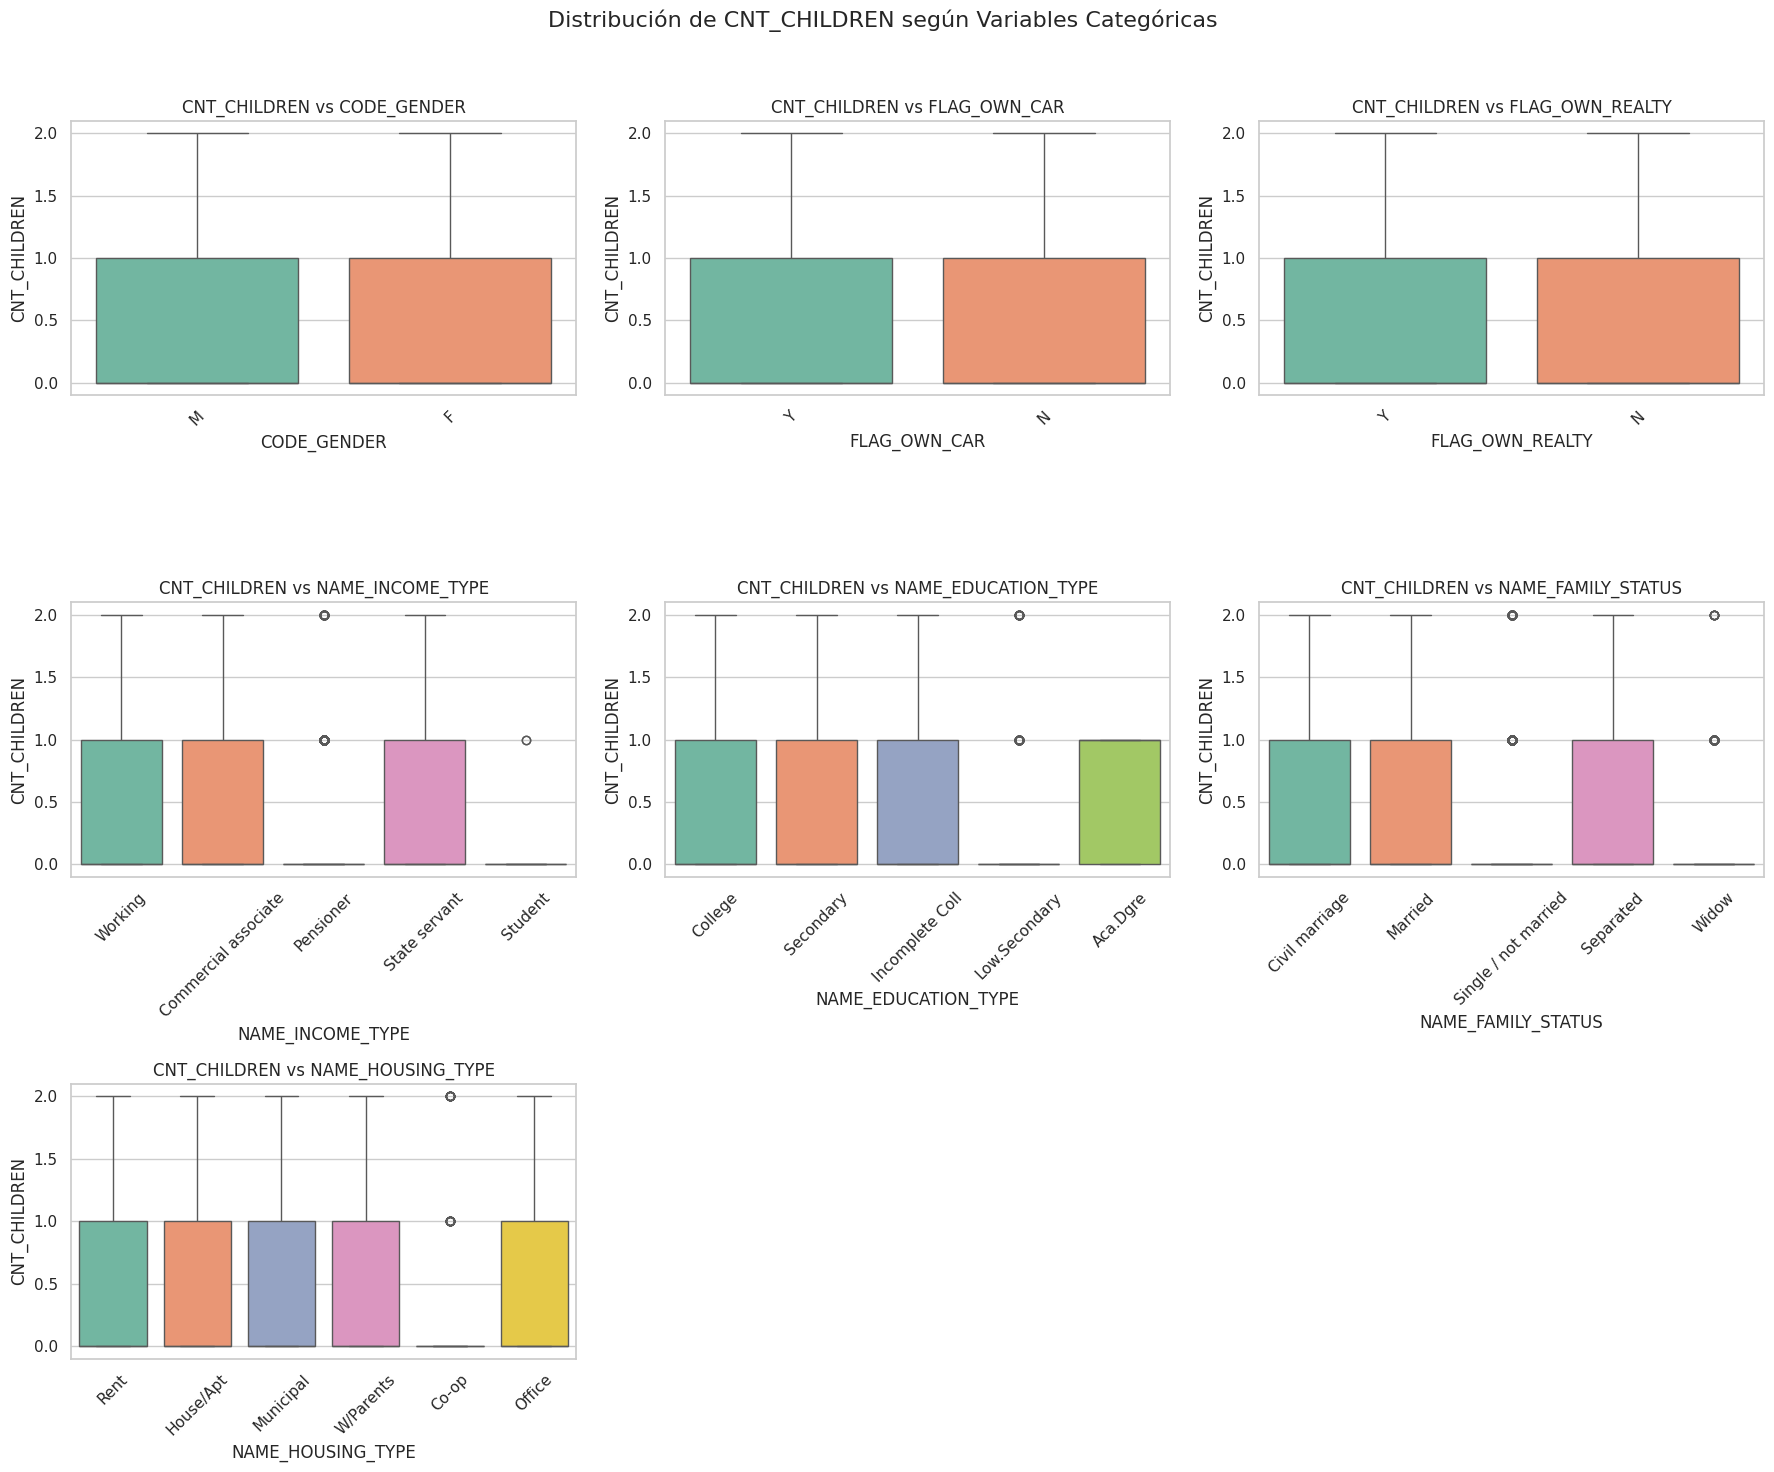

/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_var, y=num_var, ax=axes[i], palette="Set2")
/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_var, y=num_var, ax=axes[i], palette="Set2")
/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_var, y=num_var, ax=axes[i], palette="Set2")
/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be

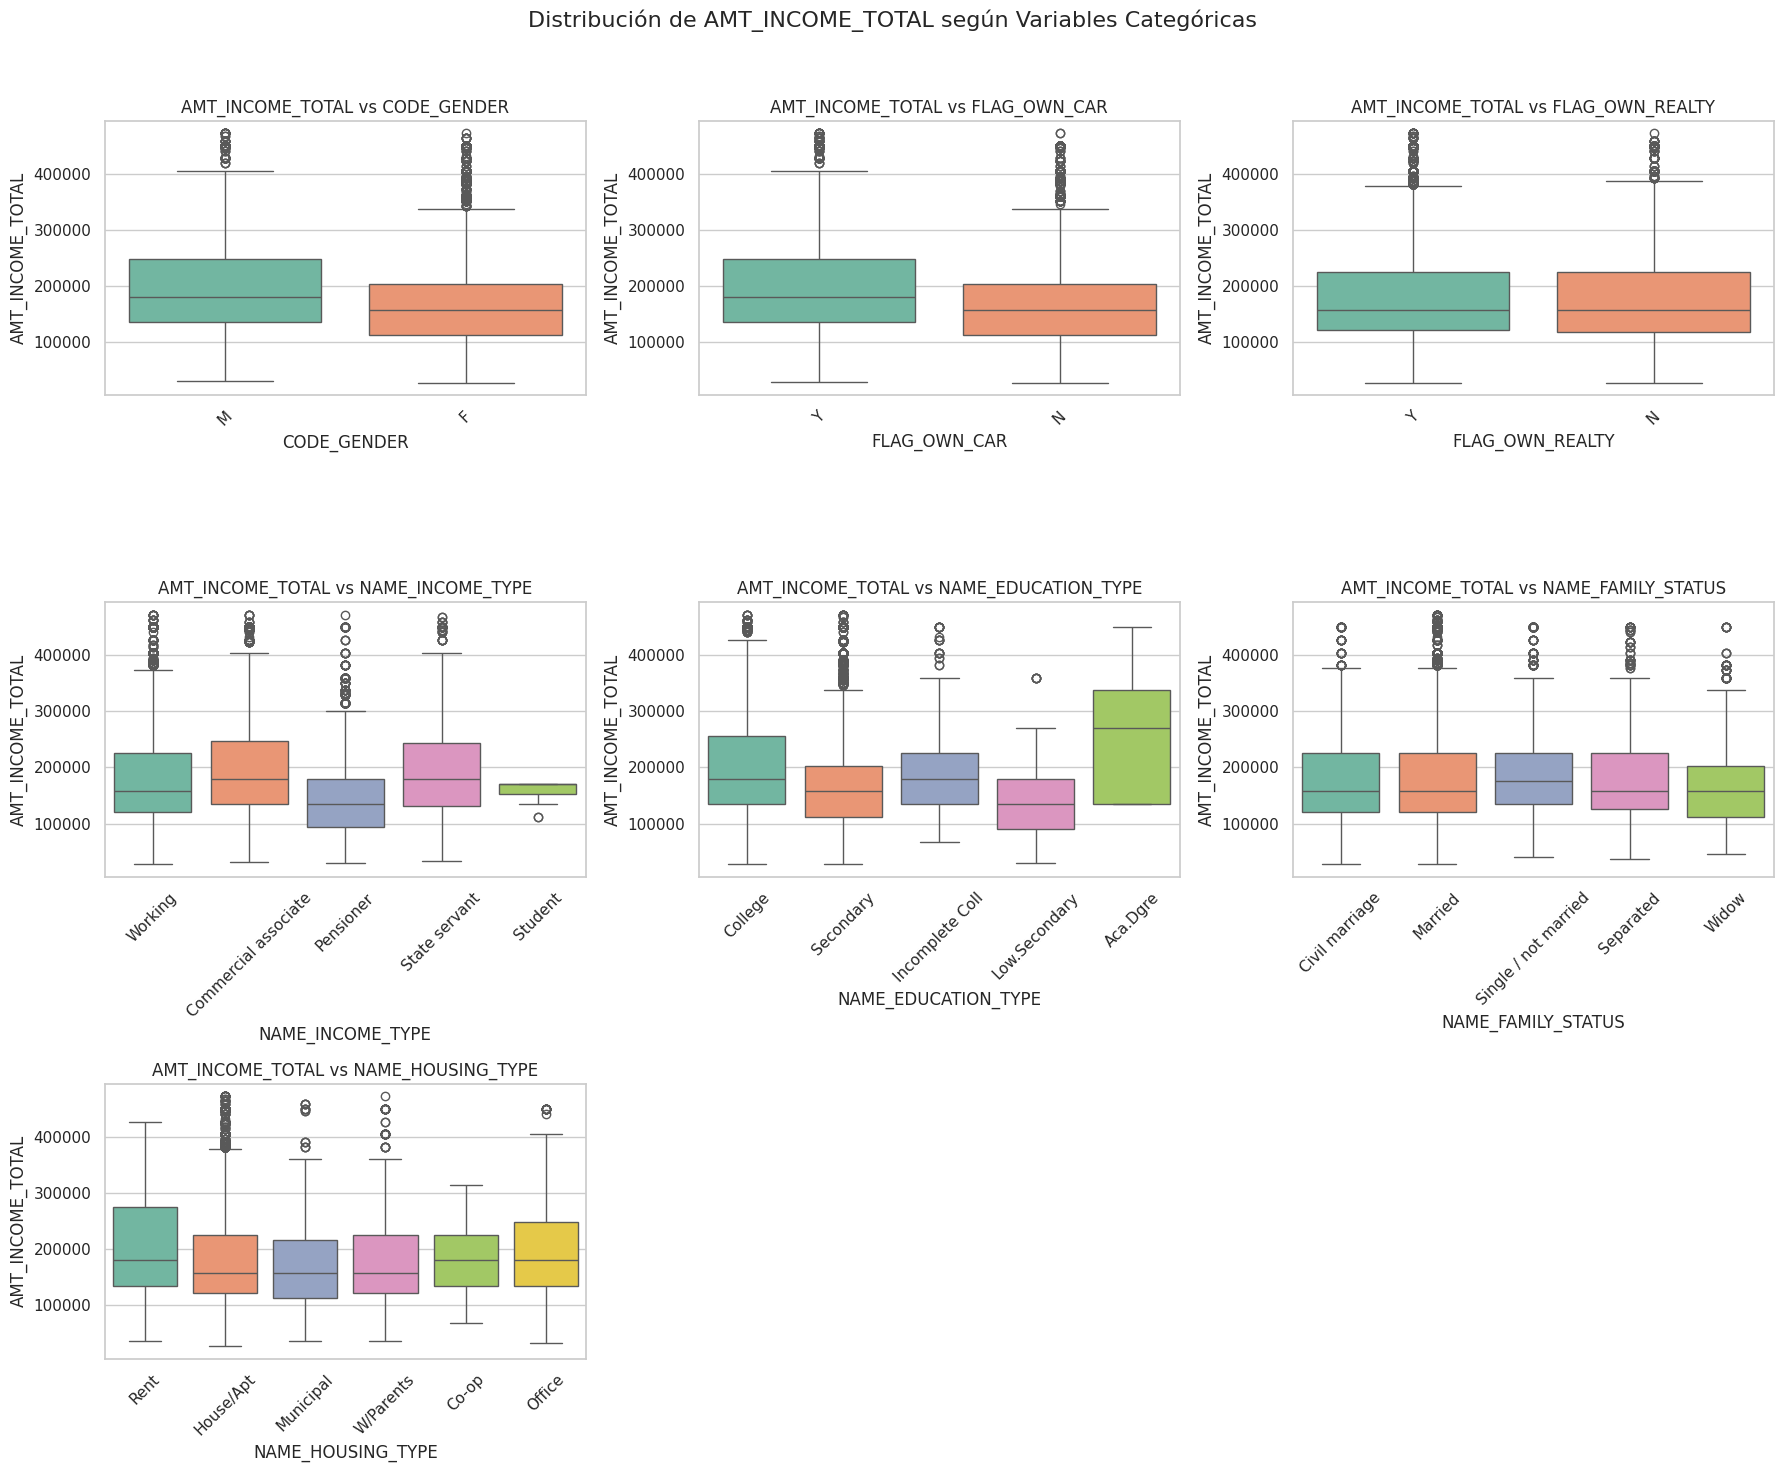

/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_var, y=num_var, ax=axes[i], palette="Set2")
/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_var, y=num_var, ax=axes[i], palette="Set2")
/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_var, y=num_var, ax=axes[i], palette="Set2")
/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be

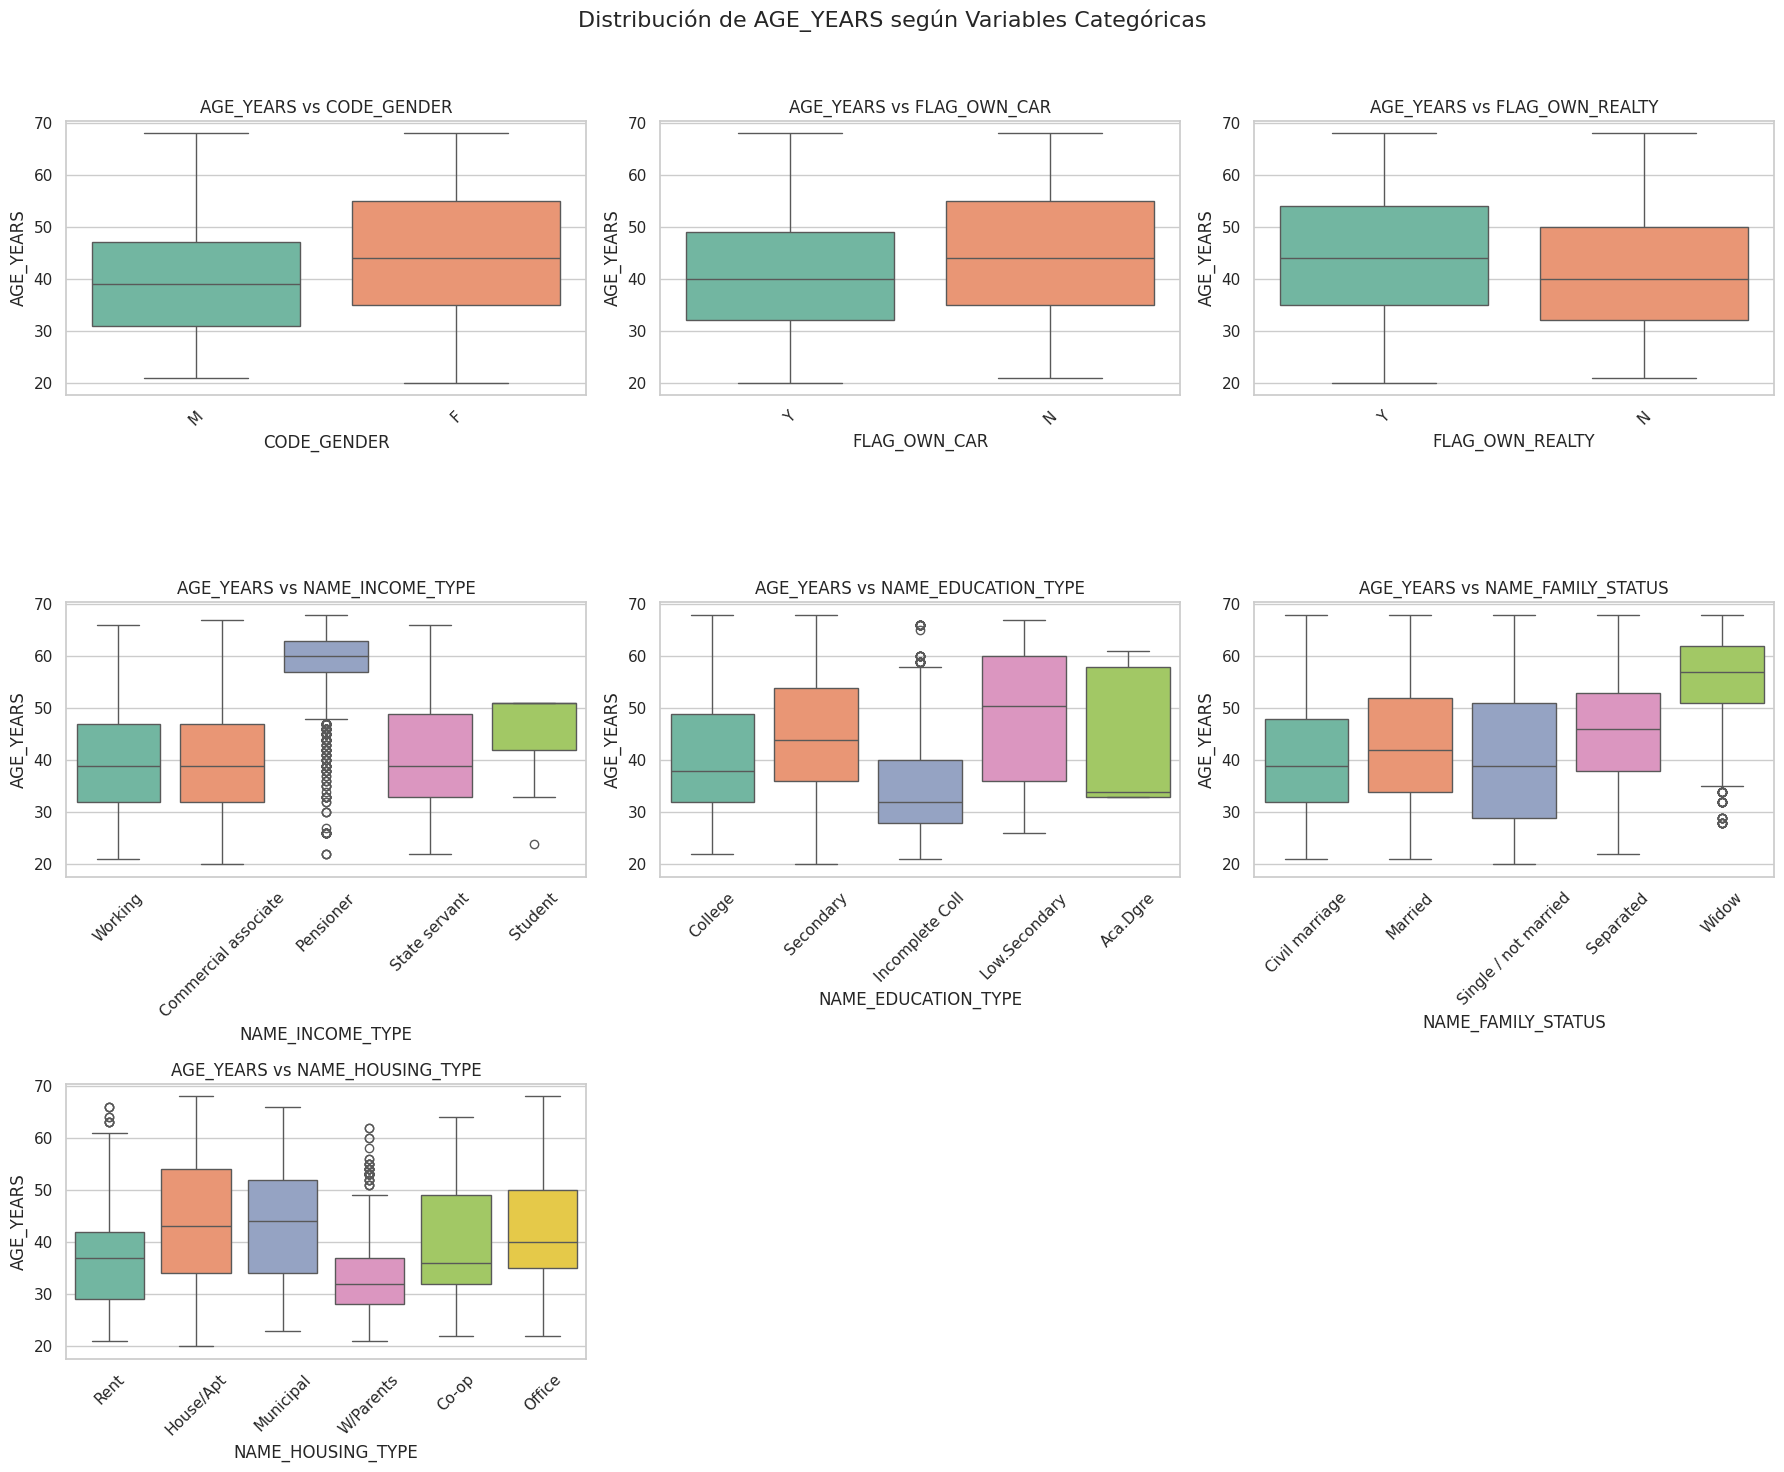

/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_var, y=num_var, ax=axes[i], palette="Set2")
/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_var, y=num_var, ax=axes[i], palette="Set2")
/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_var, y=num_var, ax=axes[i], palette="Set2")
/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be

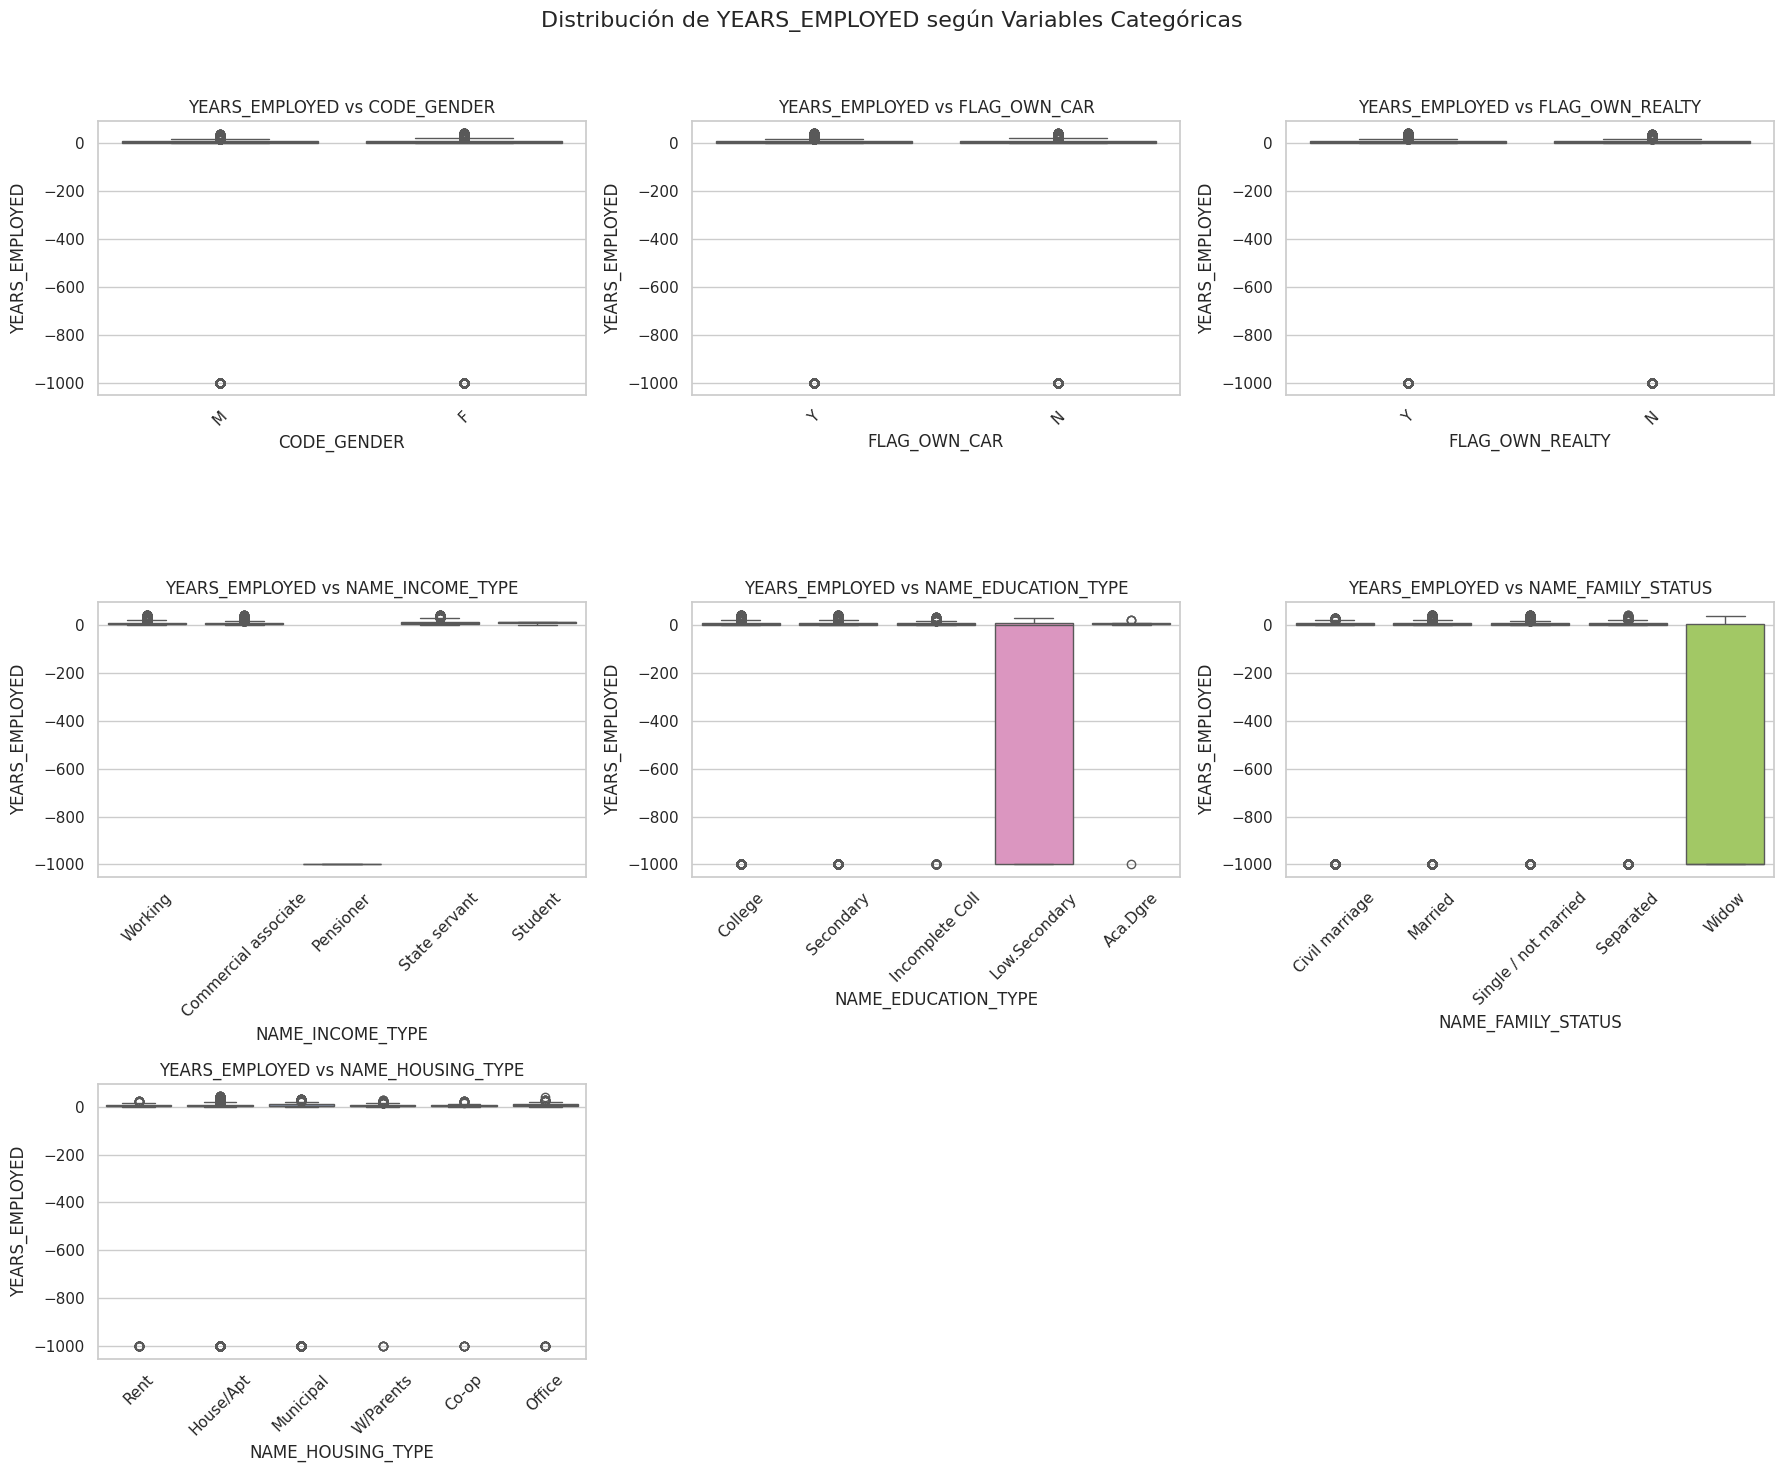

/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_var, y=num_var, ax=axes[i], palette="Set2")
/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_var, y=num_var, ax=axes[i], palette="Set2")
/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_var, y=num_var, ax=axes[i], palette="Set2")
/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be

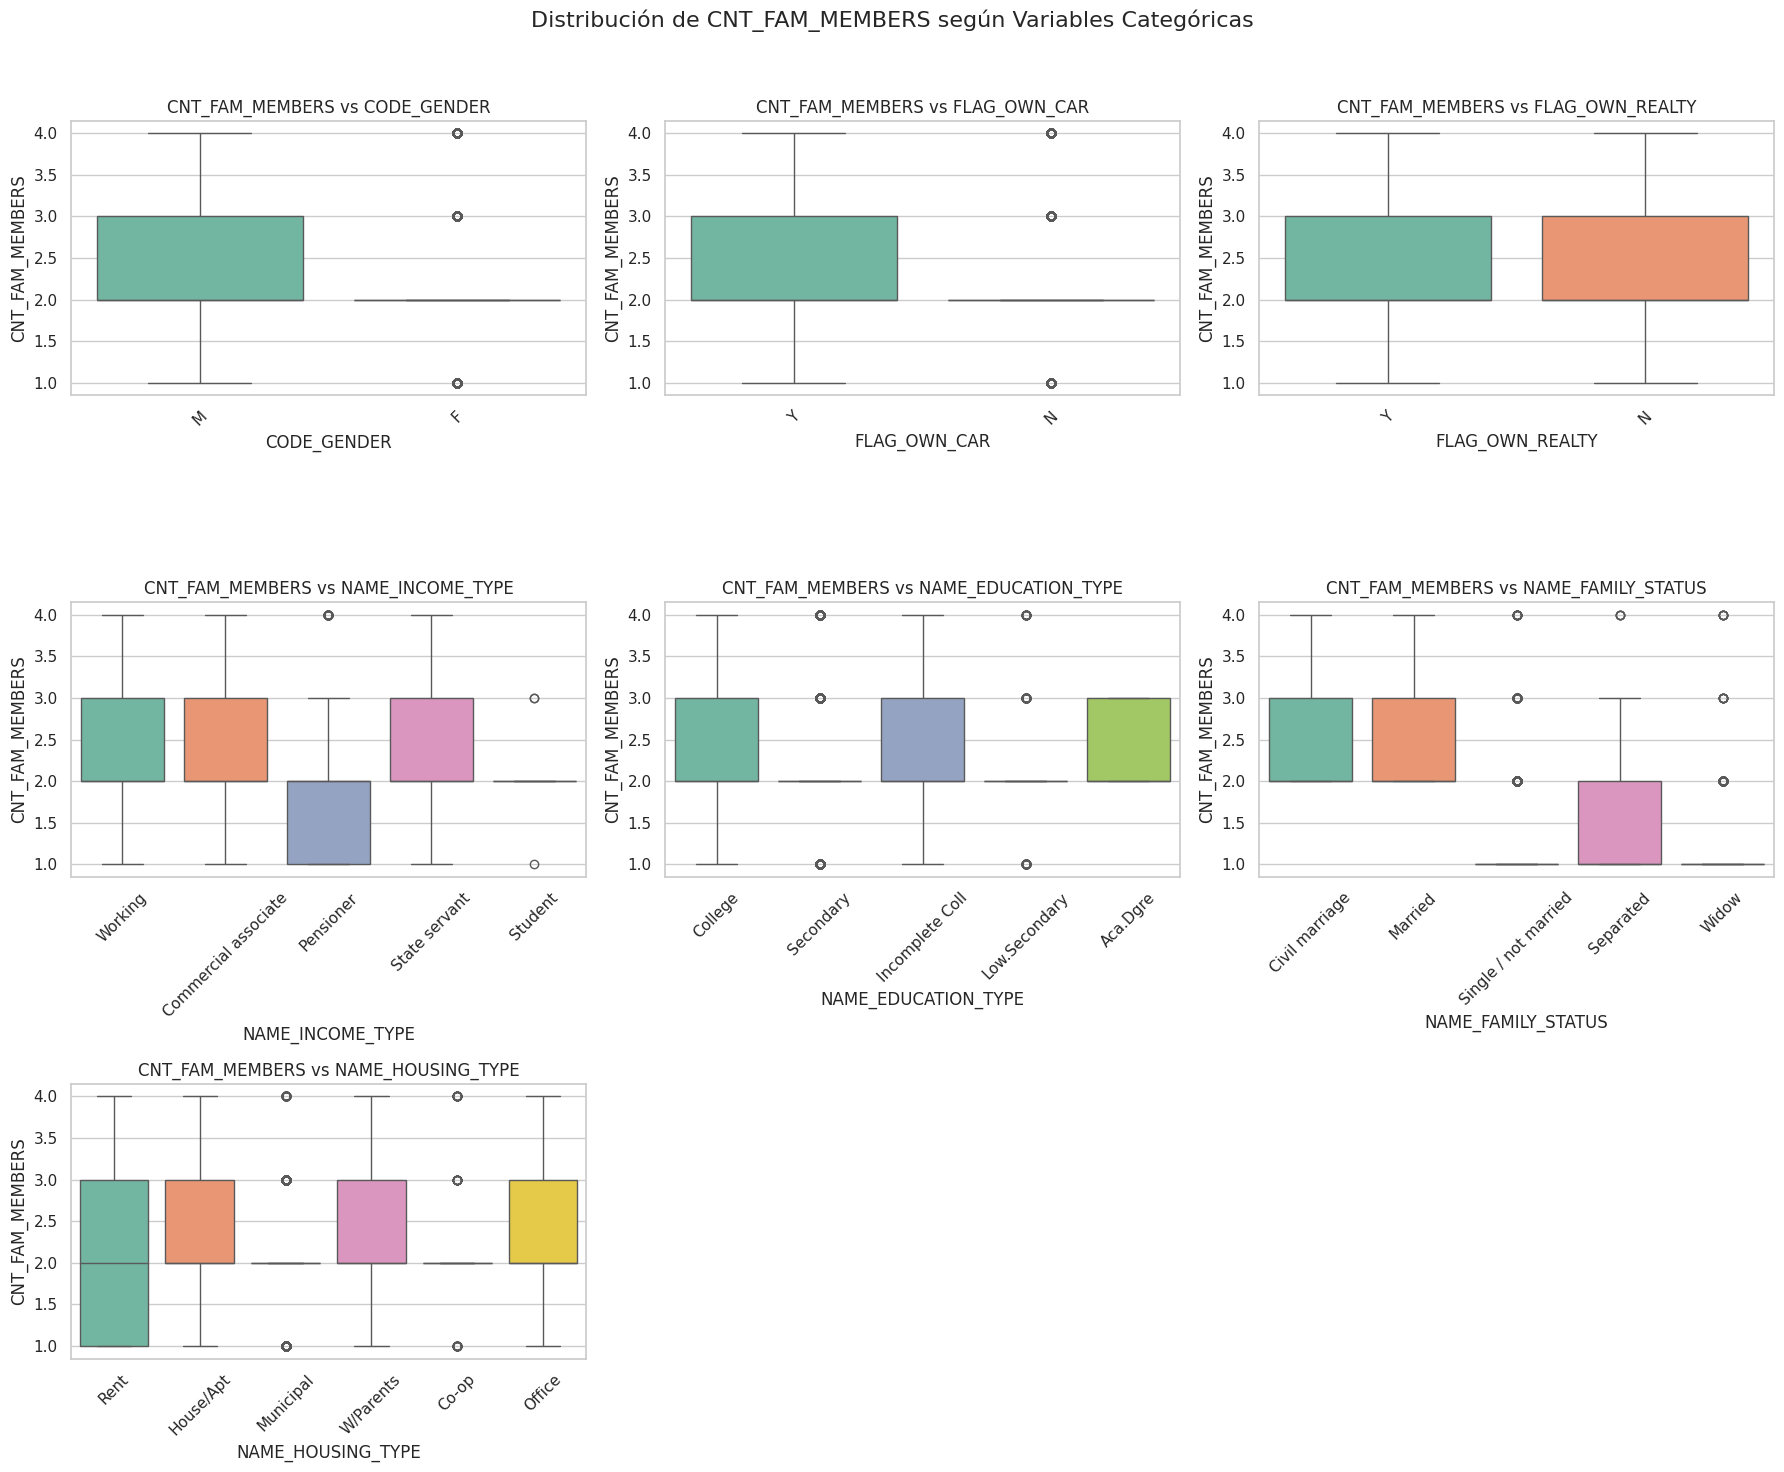

/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_var, y=num_var, ax=axes[i], palette="Set2")
/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_var, y=num_var, ax=axes[i], palette="Set2")
/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_var, y=num_var, ax=axes[i], palette="Set2")
/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be

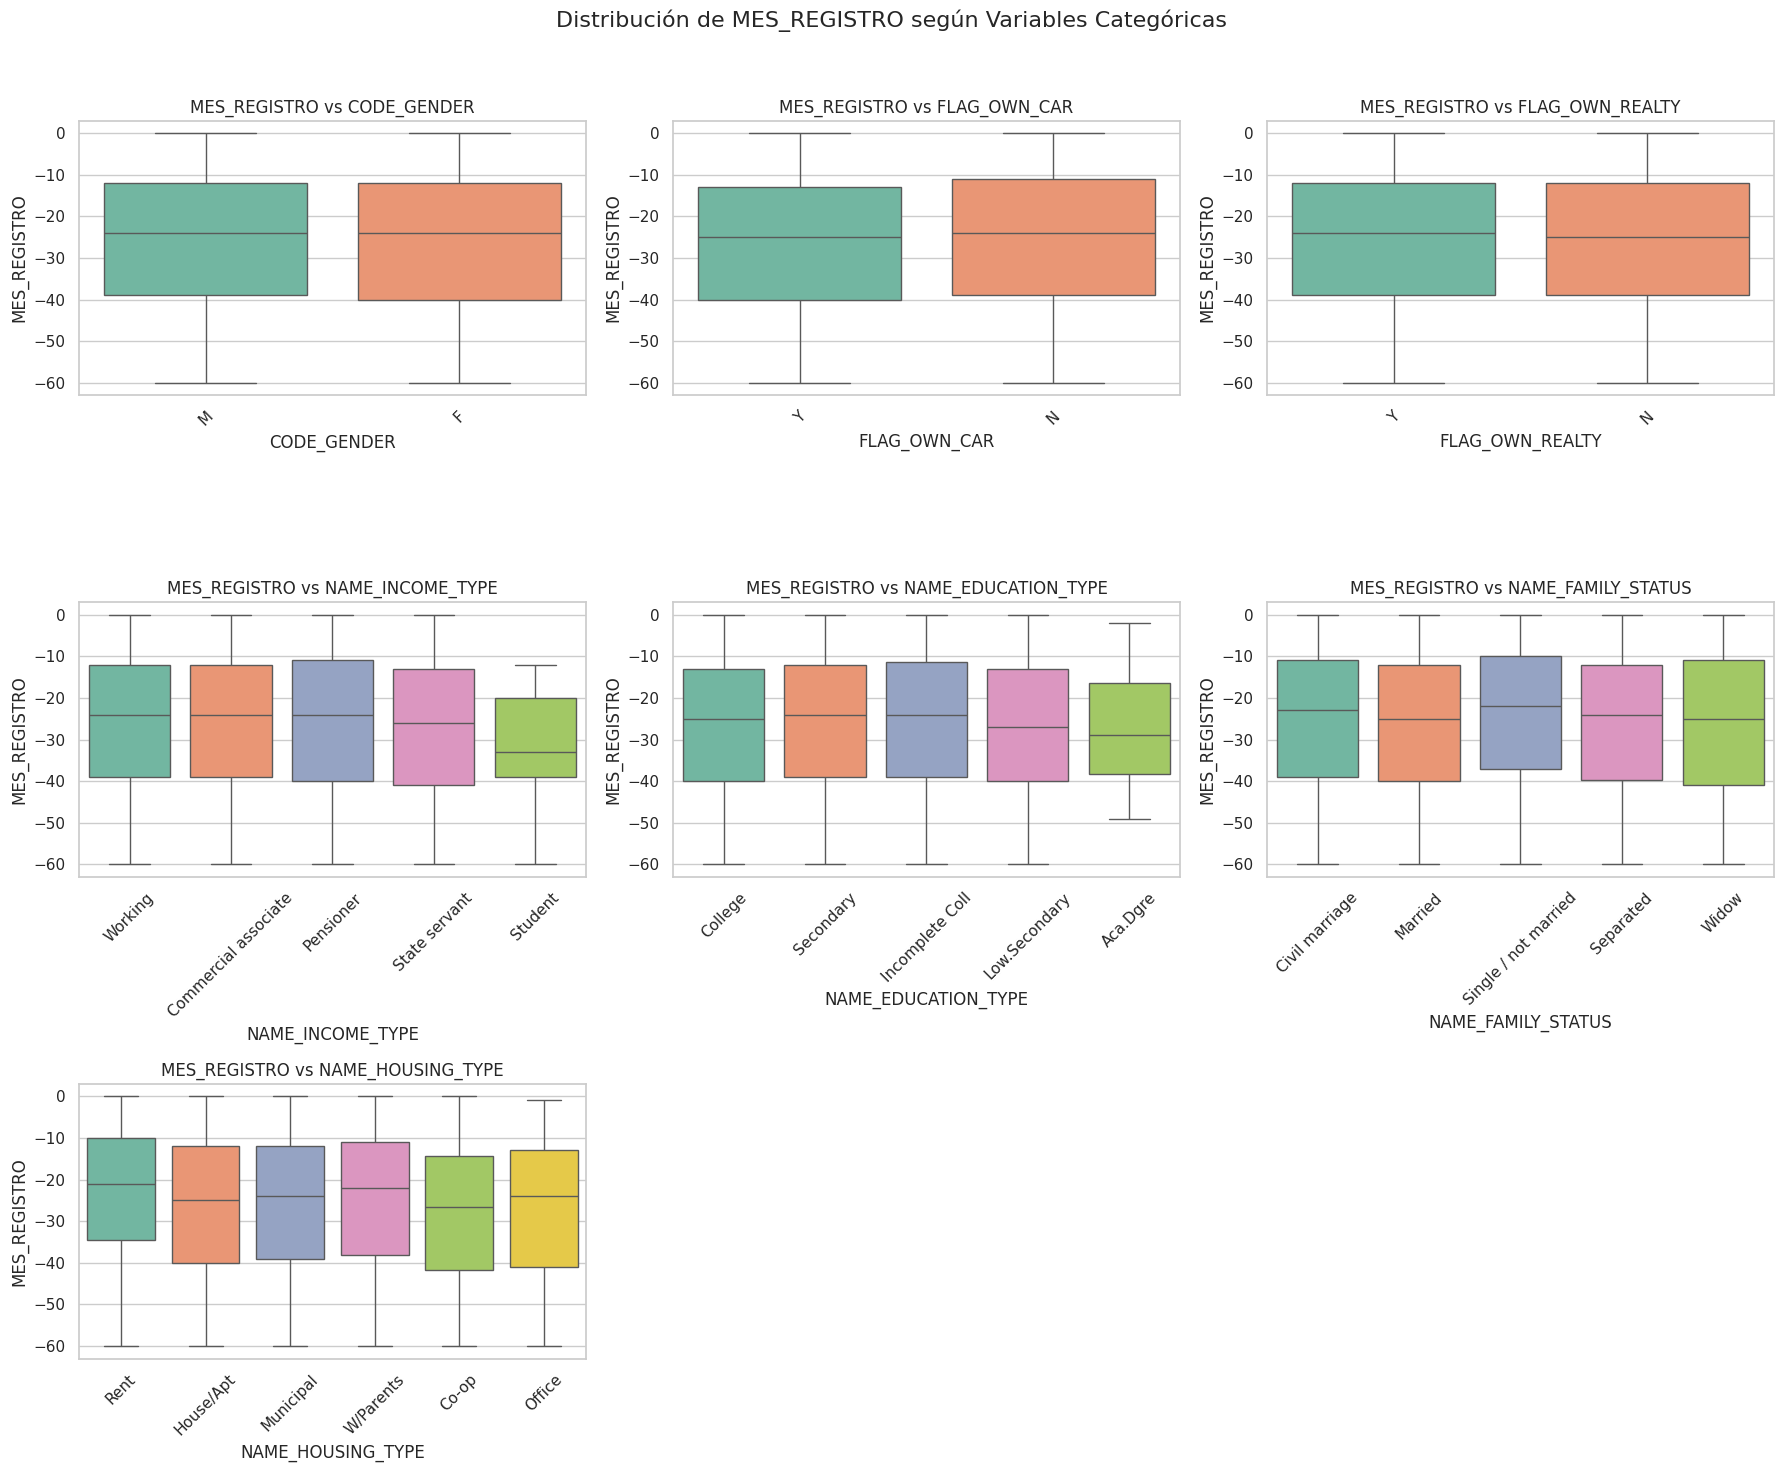

/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_var, y=num_var, ax=axes[i], palette="Set2")
/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_var, y=num_var, ax=axes[i], palette="Set2")
/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_var, y=num_var, ax=axes[i], palette="Set2")
/tmp/ipython-input-3919930950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be

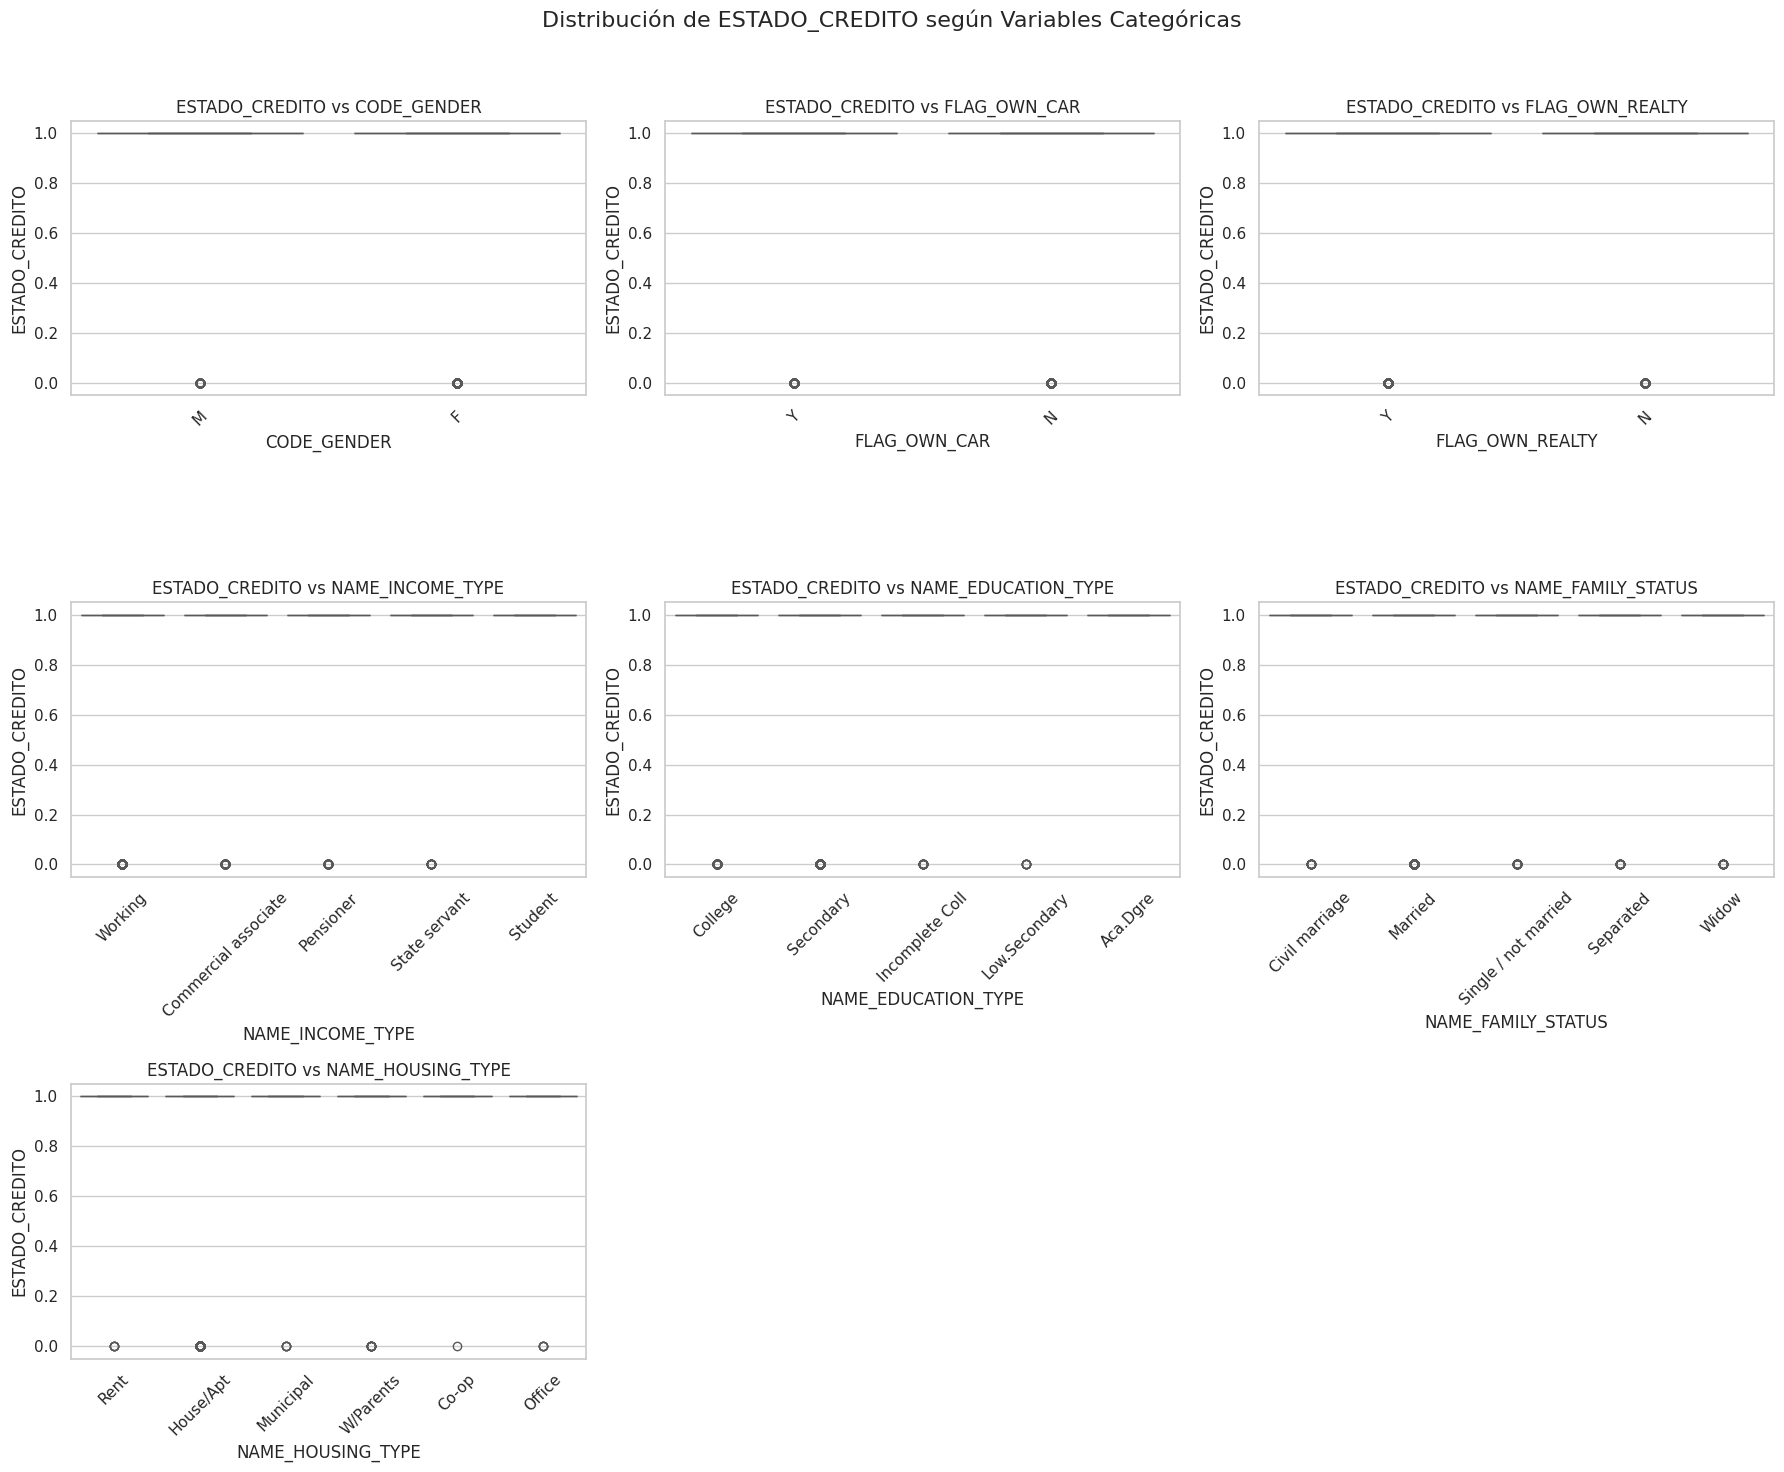

In [54]:
#importar math
import math

# Copia del DataFrame original
df = df_corr.copy()

# Selección automática de variables
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Si hay variables no útiles como IDs, puedes excluirlas
if 'ID' in numeric_columns:
    numeric_columns.remove('ID')

# Estilo visual
sns.set(style="whitegrid")

# Generar una figura por variable numérica
for num_var in numeric_columns:
    total_plots = len(categorical_columns)
    cols = 3
    rows = math.ceil(total_plots / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
    fig.suptitle(f"Distribución de {num_var} según Variables Categóricas", fontsize=16)
    axes = axes.flatten()

    for i, cat_var in enumerate(categorical_columns):
        sns.boxplot(data=df, x=cat_var, y=num_var, ax=axes[i], palette="Set2")
        axes[i].set_title(f"{num_var} vs {cat_var}")
        axes[i].tick_params(axis='x', rotation=45)

    # Eliminar subplots vacíos
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

### 📈 12. Matriz de Correlación de Variables Numéricas

/tmp/ipython-input-3016419565.py:19: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


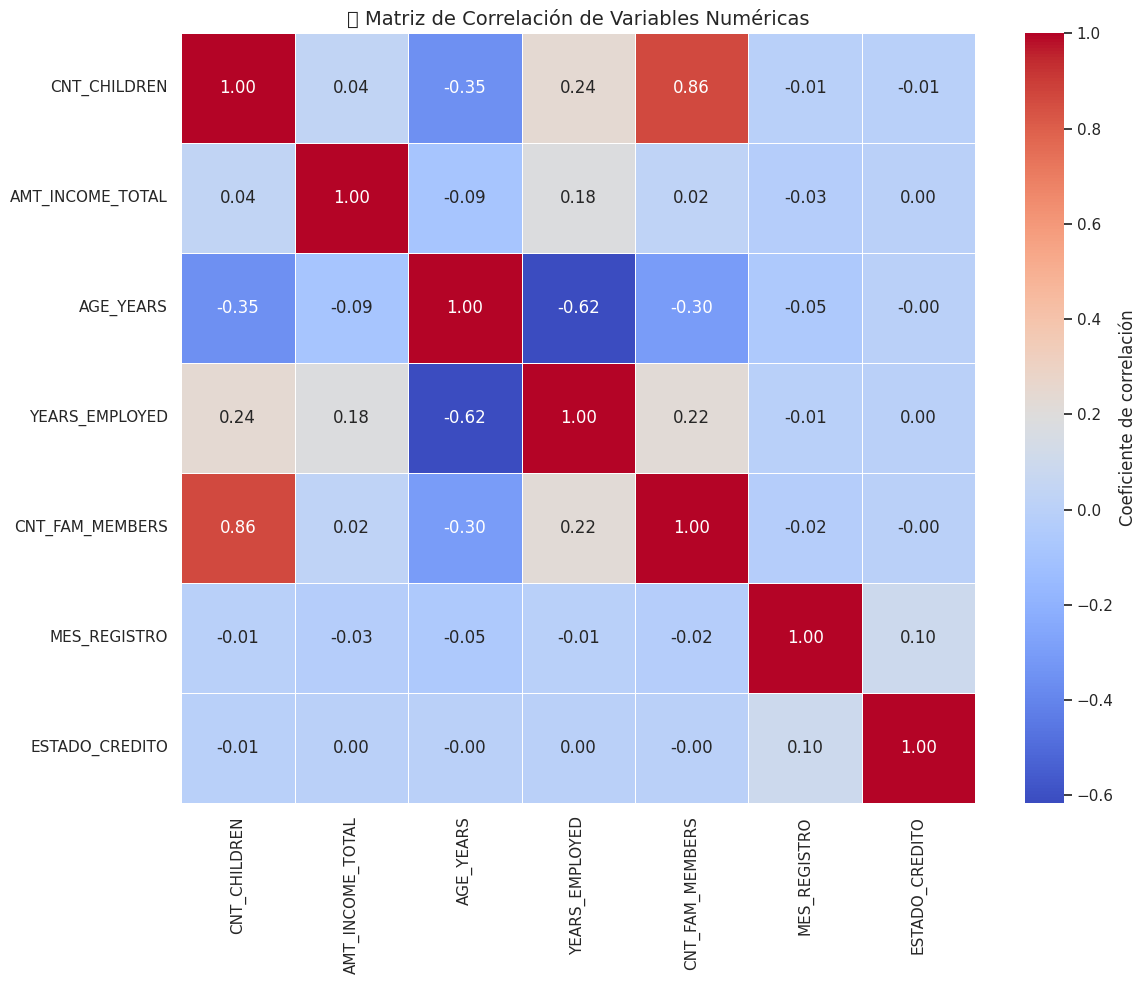

In [55]:
# Suponiendo que estás trabajando con el DataFrame limpio y sin outliers:
# Asegúrate de trabajar solo con columnas numéricas
numeric_df = df_corr.select_dtypes(include=["int64", "float64"])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"label": "Coeficiente de correlación"}
)
plt.title("📈 Matriz de Correlación de Variables Numéricas", fontsize=14)
plt.tight_layout()
plt.show()

## Análisis de componentes principales (ACP) (gráficos de varianza explicada y contribución de variables a las 2 primeras componentes).

In [ ]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          36457 non-null  object 
 1   FLAG_OWN_CAR         36457 non-null  object 
 2   FLAG_OWN_REALTY      36457 non-null  object 
 3   CNT_CHILDREN         36457 non-null  int64  
 4   AMT_INCOME_TOTAL     36457 non-null  float64
 5   NAME_INCOME_TYPE     36457 non-null  object 
 6   NAME_EDUCATION_TYPE  36457 non-null  object 
 7   NAME_FAMILY_STATUS   36457 non-null  object 
 8   NAME_HOUSING_TYPE    36457 non-null  object 
 9   AGE_YEARS            36457 non-null  float64
 10  YEARS_EMPLOYED       36457 non-null  float64
 11  CNT_FAM_MEMBERS      36457 non-null  float64
 12  MES_REGISTRO         36457 non-null  int64  
 13  ESTADO_CREDITO       36457 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 3.9+ MB


In [56]:
df_corr.head(2)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,MES_REGISTRO,ESTADO_CREDITO
0,M,Y,Y,0.0,427500.0,Working,College,Civil marriage,Rent,32.0,12.4,2.0,-15,1
1,M,Y,Y,0.0,427500.0,Working,College,Civil marriage,Rent,32.0,12.4,2.0,-14,1


### Transformar datos categóricos a numéricos

In [57]:
# Crear una copia del DataFrame original
df_encoded = df_corr.copy()

# Diccionario para almacenar los codificadores
encoders = {}

# Lista de columnas categóricas a codificar
categorical_cols = [
    "CODE_GENDER",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "NAME_INCOME_TYPE",
    "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE"
]

# Reemplazo directo de cada columna por su codificación numérica
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str).str.title())
    encoders[col] = le  # Guardar el codificador si se requiere invertir luego

# Confirmación de que todas las columnas han sido transformadas
print("✅ Variables categóricas reemplazadas exitosamente por valores numéricos.")
print(df_encoded[categorical_cols].head())

✅ Variables categóricas reemplazadas exitosamente por valores numéricos.
   CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  NAME_INCOME_TYPE  \
0            1             1                1                 4   
1            1             1                1                 4   
2            1             1                1                 4   
3            0             0                1                 0   
4            0             0                1                 0   

   NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  
0                    1                   0                  4  
1                    1                   0                  4  
2                    4                   1                  1  
3                    4                   3                  1  
4                    4                   3                  1  


In [58]:
df_encoded.head(2)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,MES_REGISTRO,ESTADO_CREDITO
0,1,1,1,0.0,427500.0,4,1,0,4,32.0,12.4,2.0,-15,1
1,1,1,1,0.0,427500.0,4,1,0,4,32.0,12.4,2.0,-14,1


In [59]:
# Usamos el DataFrame con todas las variables ya numéricas
df_ready = df_encoded.copy()

# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_ready)

# Ajustar PCA a todos los datos
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# DataFrame con las nuevas componentes principales
pca_scores = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])


### Analizar la varianza explicada

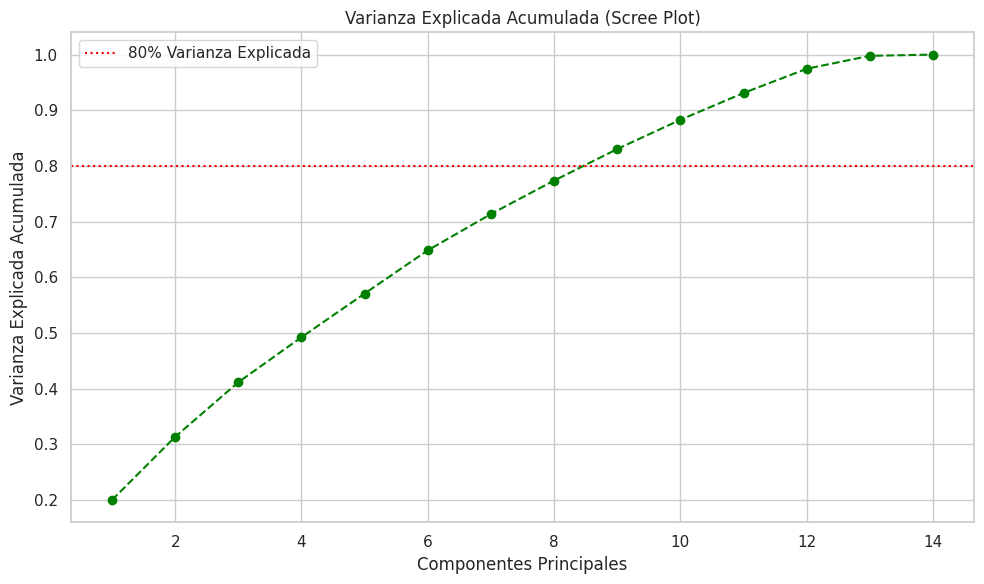

In [60]:
var_exp = pca.explained_variance_ratio_
cum_var_exp = var_exp.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(var_exp)+1), cum_var_exp, marker='o', linestyle='--', color='green')
plt.axhline(y=0.80, color='red', linestyle=':', label='80% Varianza Explicada')
plt.xlabel("Componentes Principales")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Varianza Explicada Acumulada (Scree Plot)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Calcular y analizar las cargas (loadings)

In [61]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=df_ready.columns  # todas las variables originales
)

loadings.round(3).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
CODE_GENDER,0.230,-0.299,0.289,0.407,0.030,-0.247,-0.138,0.130,0.059,-0.036,-0.055,0.703,0.095,-0.003
FLAG_OWN_CAR,0.230,-0.245,0.421,0.263,0.001,-0.172,-0.057,0.023,0.017,-0.483,-0.036,-0.610,-0.002,-0.014
FLAG_OWN_REALTY,-0.084,0.165,0.289,0.124,0.124,0.580,-0.222,0.434,-0.522,-0.006,-0.062,0.022,-0.012,-0.001
CNT_CHILDREN,0.426,0.362,-0.011,-0.158,0.048,0.051,-0.126,0.319,0.368,-0.060,0.191,0.010,0.084,-0.597
AMT_INCOME_TOTAL,0.139,-0.332,0.458,-0.185,0.053,0.090,0.045,-0.025,0.106,0.664,0.331,-0.150,-0.169,0.005


### Calcular contribuciones de las variables a PC1 y PC2

In [62]:
contrib_pc1 = 100 * (loadings["PC1"] ** 2) / sum(loadings["PC1"] ** 2)
contrib_pc2 = 100 * (loadings["PC2"] ** 2) / sum(loadings["PC2"] ** 2)

contrib_df = pd.DataFrame({
    "PC1 (%)": contrib_pc1.round(2),
    "PC2 (%)": contrib_pc2.round(2)
}).sort_values(by="PC1 (%)", ascending=False)

contrib_df.head(10)

,PC1 (%),PC2 (%)
CNT_FAM_MEMBERS,21.57,21.80
CNT_CHILDREN,18.19,13.14
AGE_YEARS,17.46,5.02
YEARS_EMPLOYED,15.25,8.42
NAME_FAMILY_STATUS,7.59,12.16
FLAG_OWN_CAR,5.28,6.02
CODE_GENDER,5.27,8.92
NAME_INCOME_TYPE,4.10,1.95
AMT_INCOME_TOTAL,1.92,11.02
NAME_EDUCATION_TYPE,1.49,3.87


### Interpretar individuos extremos (opcional pero útil)

In [63]:
df_extremos = df_ready.copy()
df_extremos["PC1"] = pca_scores["PC1"]
df_extremos["PC2"] = pca_scores["PC2"]

# 5 individuos con valores más altos de PC1 y PC2
top_pc1 = df_extremos.sort_values(by="PC1", ascending=False).head(5)
top_pc2 = df_extremos.sort_values(by="PC2", ascending=False).head(5)

print("🔍 Perfiles extremos PC1:\n", top_pc1[df_ready.columns.tolist() + ["PC1"]])
print("🔍 Perfiles extremos PC2:\n", top_pc2[df_ready.columns.tolist() + ["PC2"]])

🔍 Perfiles extremos PC1:
        CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
29006            1             1                0           2.0   
29705            1             1                0           2.0   
29711            1             1                0           2.0   
29709            1             1                0           2.0   
29707            1             1                0           2.0   

       AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
29006          315000.0                 4                    1   
29705          135000.0                 4                    1   
29711          135000.0                 4                    1   
29709          135000.0                 4                    1   
29707          135000.0                 4                    1   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  AGE_YEARS  YEARS_EMPLOYED  \
29006                   1                  5       28.0             2.0   
29705                   

Analiza qué características tienen los individuos que están más lejos del centro. Esto ayuda a comprender casos atípicos o segmentos extremos.

## MODELO DE REGRESION LOGISTICA

In [64]:
df_merged_completo.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,MES_REGISTRO,ESTADO_CREDITO
0,M,Y,Y,0.0,427500.0,Working,College,Civil marriage,Rent,32,12.4,2.0,-15,1
1,M,Y,Y,0.0,427500.0,Working,College,Civil marriage,Rent,32,12.4,2.0,-14,1
2,M,Y,Y,0.0,112500.0,Working,Secondary,Married,House/Apt,58,3.1,2.0,-29,1
3,F,N,Y,0.0,270000.0,Commercial associate,Secondary,Single / not married,House/Apt,52,8.4,1.0,-4,1
4,F,N,Y,0.0,270000.0,Commercial associate,Secondary,Single / not married,House/Apt,52,8.4,1.0,-26,1


In [65]:
#CONVERTIR LAS VARIABLES CATEGORICAS A NUMERICAS CON LABEL ENCODER
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_merged_completo.select_dtypes(include=["object"]):
    df_merged_completo[col] = le.fit_transform(df_merged_completo[col])

df_merged_completo.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,MES_REGISTRO,ESTADO_CREDITO
0,1,1,1,0.0,427500.0,4,1,0,4,32,12.4,2.0,-15,1
1,1,1,1,0.0,427500.0,4,1,0,4,32,12.4,2.0,-14,1
2,1,1,1,0.0,112500.0,4,4,1,1,58,3.1,2.0,-29,1
3,0,0,1,0.0,270000.0,0,4,3,1,52,8.4,1.0,-4,1
4,0,0,1,0.0,270000.0,0,4,3,1,52,8.4,1.0,-26,1


In [66]:
X = df_merged_completo.iloc[:,1:-1]

y = df_merged_completo.iloc[:,-1]

#SEPARAR DATA EN SETS DE ENTRENAMIENTO Y PRUEBA (IMPORTAR LIBRERIAS)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)


In [67]:
#ESCALAMIENTO CON MIN MAX SCALER
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)

In [82]:
#HACER OVERSAMPLING
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)

print(f"TARGETS DE ENTRENAMIENTO ORIGINALES: {y_train.value_counts()}")
print(f"TARGETS DE ENTRENAMIENTO CON EL OVERSAMPLE: {y_balanced.value_counts()}")
print(f"TARGETS DE TESTEO ORIGINALES: {y_test.value_counts()}")
print(f"TARGETS DE TESTEO CON EL OVERSAMPLE: {y_test_balanced.value_counts()}")

TARGETS DE ENTRENAMIENTO ORIGINALES: ESTADO_CREDITO
1    25097
0      176
Name: count, dtype: int64
TARGETS DE ENTRENAMIENTO CON EL OVERSAMPLE: ESTADO_CREDITO
1    25097
0    25097
Name: count, dtype: int64
TARGETS DE TESTEO ORIGINALES: ESTADO_CREDITO
1    10744
0       88
Name: count, dtype: int64
TARGETS DE TESTEO CON EL OVERSAMPLE: ESTADO_CREDITO
1    10744
0    10744
Name: count, dtype: int64


In [69]:
#SE USA EL MODELO DE REGRESION LOGISTICA
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_balanced, y_balanced)

LogisticRegression()

In [70]:
#MOSTRAR EVALUACION DEL MODELO
from sklearn.metrics import classification_report
y_pred = model.predict(X_test_balanced)
print(classification_report(y_test_balanced, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76     10744
           1       0.77      0.71      0.74     10744

    accuracy                           0.75     21488
   macro avg       0.75      0.75      0.75     21488
weighted avg       0.75      0.75      0.75     21488



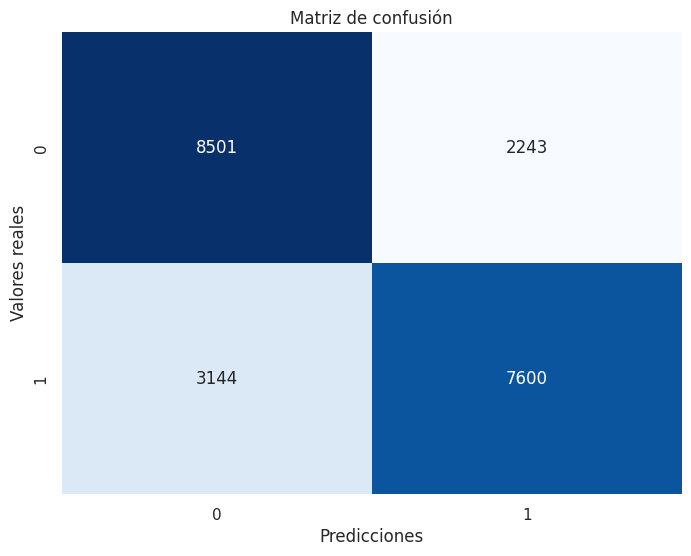

In [71]:
#MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_test_balanced, y_pred)

# Crear el mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.title("Matriz de confusión")
plt.show()

## Ajuste del modelo inicial (regresión lineal o logística según tipo de variable dependiente) e identificación de variables significativas.

### 📈 1. Regresión Lineal: predecir `AMT_INCOME_TOTAL` (Ingreso Total)

In [79]:
# Definir variables predictoras y dependiente
X_lin = df_merged_completo[['AGE_YEARS', 'YEARS_EMPLOYED', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'FLAG_OWN_CAR', 'CODE_GENDER']]
y_lin = df_merged_completo['AMT_INCOME_TOTAL']

# Agregar constante para intercepto
X_lin = sm.add_constant(X_lin)

# Ajustar modelo
modelo_lineal = sm.OLS(y_lin, X_lin).fit()

# Ver resumen del modelo
print(modelo_lineal.summary())

                            OLS Regression Results                            
Dep. Variable:       AMT_INCOME_TOTAL   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     565.4
Date:                Mon, 04 Aug 2025   Prob (F-statistic):               0.00
Time:                        00:49:03   Log-Likelihood:            -4.6595e+05
No. Observations:               36105   AIC:                         9.319e+05
Df Residuals:                   36098   BIC:                         9.320e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.574e+05   3327.698     

📌 ¿Qué observar?
- **Coef. (coeficientes):** indican cuánto cambia el ingreso por unidad de cambio en cada variable.
- **P>|t|:** si es < 0.05 → variable significativa.
- **R-squared:** indica qué tanto del ingreso puede ser explicado por estas variables.

### 📊 2. Regresión Logística: predecir `FLAG_OWN_CAR` (¿Posee auto?)

In [81]:
# Definir variables predictoras y dependiente
X_log = df_merged_completo[['CODE_GENDER', 'AGE_YEARS', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'YEARS_EMPLOYED']]
y_log = df_merged_completo['FLAG_OWN_CAR']

# Agregar constante
X_log = sm.add_constant(X_log)

# Ajustar modelo logístico
modelo_logistico = sm.Logit(y_log, X_log).fit()

# Ver resumen del modelo
print(modelo_logistico.summary())

Optimization terminated successfully.
         Current function value: 0.573978
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           FLAG_OWN_CAR   No. Observations:                36105
Model:                          Logit   Df Residuals:                    36098
Method:                           MLE   Df Model:                            6
Date:                Mon, 04 Aug 2025   Pseudo R-squ.:                  0.1357
Time:                        00:52:51   Log-Likelihood:                -20723.
converged:                       True   LL-Null:                       -23977.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.3571      0.081    -29.004      0.000      -2.516      -2.198
CODE_GENDER

📌 ¿Qué observar?
- **Coef. (coeficientes): **valores positivos aumentan la probabilidad de poseer auto.
- **P>|z|:** si es < 0.05 → variable significativa.
- **Pseudo R-squared:** indica el poder explicativo del modelo (más bajo que el de regresión lineal).

## Ajuste del segundo modelo utilizando el método backward.

Depurar el modelo de regresión (lineal o logística) eliminando iterativamente las variables menos significativas (según su p-valor), hasta quedarnos solo con las **estadísticamente significativas** (p < 0.05).

### Código para regresión lineal con método backward

In [83]:
# Variables iniciales para el modelo
X = df_encoded[[
    "AGE_YEARS",
    "YEARS_EMPLOYED",
    "CNT_FAM_MEMBERS",
    "CNT_CHILDREN",
    "FLAG_OWN_CAR",
    "CODE_GENDER"
]]
y = df_encoded["AMT_INCOME_TOTAL"]

# Agregar constante
X = sm.add_constant(X)

# Aplicar eliminación hacia atrás
def backward_elimination(X, y, significance_level=0.05):
    while True:
        model = sm.OLS(y, X).fit()
        pvalues = model.pvalues.drop("const")  # omitimos constante

        # Encontrar el predictor con mayor p-valor
        max_pval = pvalues.max()
        if max_pval > significance_level:
            excluded_feature = pvalues.idxmax()
            print(f"🔻 Eliminando variable: {excluded_feature} (p={max_pval:.4f})")
            X = X.drop(columns=[excluded_feature])
        else:
            break
    return model

# Ejecutar eliminación hacia atrás
final_model = backward_elimination(X, y)

# Resumen final del modelo
print("\n✅ Modelo final ajustado:")
print(final_model.summary())


✅ Modelo final ajustado:
                            OLS Regression Results                            
Dep. Variable:       AMT_INCOME_TOTAL   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     630.3
Date:                Mon, 04 Aug 2025   Prob (F-statistic):               0.00
Time:                        00:53:22   Log-Likelihood:            -4.5750e+05
No. Observations:               36105   AIC:                         9.150e+05
Df Residuals:                   36098   BIC:                         9.151e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           

### Código para regresión logística con método backward:

In [75]:
# Variables iniciales para el modelo logístico
X_log = df_encoded[[
    "AGE_YEARS",
    "YEARS_EMPLOYED",
    "CNT_FAM_MEMBERS",
    "CNT_CHILDREN",
    "AMT_INCOME_TOTAL",
    "CODE_GENDER"
]]
y_log = df_encoded["FLAG_OWN_CAR"]

# Agregar constante
X_log = sm.add_constant(X_log)

# Aplicar eliminación hacia atrás
def backward_elimination_logit(X, y, significance_level=0.05):
    while True:
        model = sm.Logit(y, X).fit(disp=False)
        pvalues = model.pvalues.drop("const")

        max_pval = pvalues.max()
        if max_pval > significance_level:
            excluded_feature = pvalues.idxmax()
            print(f"🔻 Eliminando variable: {excluded_feature} (p={max_pval:.4f})")
            X = X.drop(columns=[excluded_feature])
        else:
            break
    return model

# Ejecutar eliminación hacia atrás en regresión logística
final_logit_model = backward_elimination_logit(X_log, y_log)

# Mostrar resultados
print("\n✅ Modelo logístico final ajustado:")
print(final_logit_model.summary())



✅ Modelo logístico final ajustado:
                           Logit Regression Results                           
Dep. Variable:           FLAG_OWN_CAR   No. Observations:                36105
Model:                          Logit   Df Residuals:                    36098
Method:                           MLE   Df Model:                            6
Date:                Mon, 04 Aug 2025   Pseudo R-squ.:                  0.1348
Time:                        00:46:27   Log-Likelihood:                -20745.
converged:                       True   LL-Null:                       -23977.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.4589      0.082    -29.940      0.000      -2.620      -2.298
AGE_YEARS           -0.0101      0.001     -7.413      0.000      -0.013     

## Graficos comparativos entre modelos (Scatterplot y curva ROC)

### 📈 Scatterplot: Ingreso real vs. ingreso predicho (Regresión Lineal)

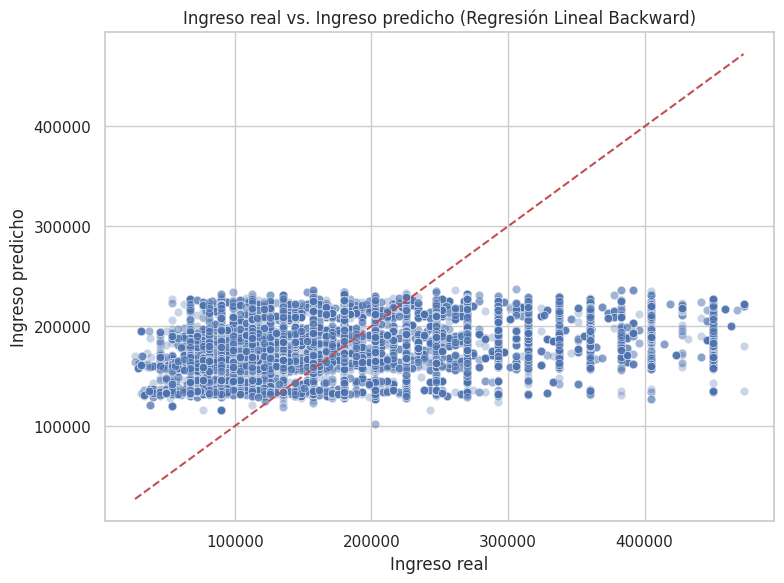

In [76]:
# Usar las variables finales del modelo ajustado
X_linear_final = pd.DataFrame(final_model.model.exog, columns=final_model.model.exog_names)
y_real = final_model.model.endog
y_pred = final_model.predict(X_linear_final)

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_real, y=y_pred, alpha=0.3)
plt.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'r--')
plt.title("Ingreso real vs. Ingreso predicho (Regresión Lineal Backward)")
plt.xlabel("Ingreso real")
plt.ylabel("Ingreso predicho")
plt.grid(True)
plt.tight_layout()
plt.show()


### Curva ROC – Modelo Logístico final (backward)

/tmp/ipython-input-2704338144.py:25: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


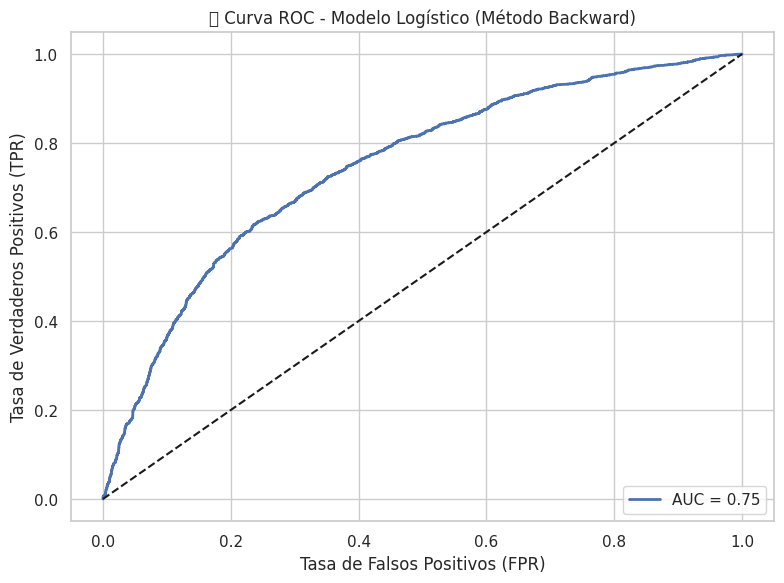

In [85]:
from sklearn.metrics import roc_curve, roc_auc_score

# Usar las mismas variables finales que quedaron en X_log
X_log_ajustado = X_log[final_logit_model.params.index]  # columnas que quedaron en el modelo

# Obtener probabilidades predichas
y_proba = final_logit_model.predict(X_log_ajustado)

# Variable dependiente real
y_true = y_log

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_true, y_proba)
roc_auc = roc_auc_score(y_true, y_proba)

# Graficar
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', linewidth=2)
plt.plot([0,1], [0,1], 'k--')  # línea de referencia
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('📈 Curva ROC - Modelo Logístico (Método Backward)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
